# E coli clustering

The purpose of this notebook is to develop the methods for clustering analysis of membrane transporters, with the example of *E coli*. 

## Sequence dataset generation

### Reading data

Reading pre-processed Uniprot data for all organisms:

In [1]:
from subpred.util import load_df

sequences = load_df("uniprot")
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
A0A0C5B5G6,MT-RNR1,Mitochondrial-derived peptide MOTS-c (Mitochon...,True,1,MRWQEMGYIFYPRKLR,9606
A0A1B0GTW7,CIROP LMLN2,Ciliated left-right organizer metallopeptidase...,True,1,MLLLLLLLLLLPPLVLRVAASRCLHDETQKSVSLLRPPFSQLPSKS...,9606
A0JNW5,BLTP3B KIAA0701 SHIP164 UHRF1BP1L,Bridge-like lipid transfer protein family memb...,True,1,MAGIIKKQILKHLSRFTKNLSPDKINLSTLKGEGELKNLELDEEVL...,9606
A0JP26,POTEB3,POTE ankyrin domain family member B3,True,1,MVAEVCSMPAASAVKKPFDLRSKMGKWCHHRFPCCRGSGKSNMGTS...,9606
A0PK11,CLRN2,Clarin-2,True,1,MPGWFKKAWYGLASLLSFSSFILIIVALVVPHWLSGKILCQTGVDL...,9606
...,...,...,...,...,...,...
X5L4R4,NOD-2,Nucleotide-binding oligomerization domain-cont...,False,2,MSPGCYKGWPFNCHLSHEEDKRRNETLLQEAETSNLQITASFVSGL...,586796
X5MBL2,GT34D,"Putative galacto(Gluco)mannan alpha-1,6-galact...",False,2,KVLYDRAFNSSDDQSALVYLLLKEKDKWADRIFIEHKYYLNGYWLD...,3352
X5MFI4,GT34D,"Putative galacto(Gluco)mannan alpha-1,6-galact...",False,2,MDEDVLCKGPLHGGSARSLKGSLKRLKRIMESLNDGLIFMGGAVSA...,3352


### Selecting organism

Filtering for *E. Coli* Strain K12: 

In [2]:
sequences = sequences[sequences.organism_id == 83333]
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P76154,ydfK b1544 JW1537,Cold shock protein YdfK,True,2,MKSKDTLKWFPAQLPEVRIILGDAVVEVAKQGRPINTRTLLDYIEG...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333
P33668,ybbC b0498 JW0487,Uncharacterized protein YbbC,True,2,MKYSSIFSMLSFFILFACNETAVYGSDENIIFMRYVEKLHLDKYSV...,83333


### Filtering

Keeping proteins that have been manually reviewed, or have sequence evidence at protein level:

In [3]:
sequences = sequences[(sequences.protein_existence == 1) | (sequences.reviewed)]
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P76157,ynfN b1551 JW5254,Uncharacterized protein YnfN,True,2,MREYPNGEKTHLTVMAAGFPSLTGDHKVIYVAADRHVTSEEILEAA...,83333
P76154,ydfK b1544 JW1537,Cold shock protein YdfK,True,2,MKSKDTLKWFPAQLPEVRIILGDAVVEVAKQGRPINTRTLLDYIEG...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333


### Sequence clustering the proteins:

The clustering at 70% sequence identity does not remove a lot of proteins for *E. coli*. This is different for other organisms. 

In [4]:
from subpred.cdhit import cd_hit

clusters = cd_hit(sequences=sequences.sequence, identity_threshold=70)
sequences = sequences.loc[clusters]
sequences

cd-hit: clustered 3277 sequences into 3236 clusters at threshold 70


,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P77564,ydhW b1672 JW1662,Uncharacterized protein YdhW,True,2,MGKMNHQDELPLAKVSEVDEAKRQWLQGMRHPVDTVTEPEPAEILA...,83333
P76157,ynfN b1551 JW5254,Uncharacterized protein YnfN,True,2,MREYPNGEKTHLTVMAAGFPSLTGDHKVIYVAADRHVTSEEILEAA...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333


### Filtering for transmembrane transporters using GO

#### Loading all GO Uniprot annotations

Read pre-processed Uniprot GO annotations:

In [5]:
go_annotations_uniprot = load_df("go")
go_annotations_uniprot


,Uniprot,qualifier,go_id,evidence_code,aspect
0,A0A009FND8,enables,GO:0000166,IEA,F
1,A0A009FND8,enables,GO:0005524,IEA,F
2,A0A009FND8,enables,GO:0051082,IEA,F
3,A0A009FND8,enables,GO:0140662,IEA,F
4,A0A009FND8,involved_in,GO:0006457,IEA,P
...,...,...,...,...,...
7452013,Z9JND5,enables,GO:0000166,IEA,F
7452014,Z9JND5,enables,GO:0005524,IEA,F
7452015,Z9JND5,enables,GO:0051082,IEA,F
7452016,Z9JND5,enables,GO:0140662,IEA,F


#### Dataset of transmembrane transport GO terms in E Coli

- Used to filter proteins for transmembrane transporters

**Creating dataset of transporter GO term annotations**

Filter for GO terms that are descendants of "transmembrane transporter activity

GO annotations for the clustered sequence dataset from *E Coli.*

In [6]:
from subpred.ontology import GeneOntology, GO_FILE

go_owl = GeneOntology(GO_FILE)
transmembrane_transport_go_terms = go_owl.get_descendants(
    go_owl.get_identifier("transmembrane transporter activity")
)
# filter GO annotations for descendants of transmembrane transporter activity
go_annotations_tmtp = go_annotations_uniprot[
    go_annotations_uniprot.go_id.isin(transmembrane_transport_go_terms)
].reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,go_id,evidence_code,aspect
0,A0A014M993,enables,GO:0015288,IEA,F
1,A0A014M993,enables,GO:0015481,IEA,F
2,A0A014M993,enables,GO:0042958,IEA,F
3,A0A022PEV8,enables,GO:0015288,IEA,F
4,A0A022PEV8,enables,GO:0015481,IEA,F
...,...,...,...,...,...
94155,X5M917,enables,GO:0022857,IBA,F
94156,Z4YKJ7,enables,GO:0015172,IEA,F
94157,Z4YKJ7,enables,GO:0015179,IEA,F
94158,Z4YKJ7,enables,GO:0015293,IEA,F


In [7]:
# add ancestors of all remaining terms
from subpred.ontology import add_go_ancestors
go_annotations_tmtp = add_go_ancestors(go_annotations_tmtp, go_owl)
go_annotations_tmtp

,Uniprot,qualifier,evidence_code,aspect,go_id
0,A0A014M993,enables,IEA,F,GO:0003674
1,A0A014M993,enables,IEA,F,GO:0015288
2,A0A014M993,enables,IEA,F,GO:0022803
3,A0A014M993,enables,IEA,F,GO:0005215
4,A0A014M993,enables,IEA,F,GO:0022829
...,...,...,...,...,...
741880,Z4YKJ7,enables,IEA,F,GO:0015294
741881,Z4YKJ7,enables,IEA,F,GO:0015081
741882,Z4YKJ7,enables,IEA,F,GO:0015370
741883,Z4YKJ7,enables,IEA,F,GO:0022853


In [8]:
# filter GO annotations and their ancestors for descendants of transmembrane transporter activity again
go_annotations_tmtp = go_annotations_tmtp[
    go_annotations_tmtp.go_id.isin(transmembrane_transport_go_terms)
].reset_index(drop=True)
go_annotations_tmtp = go_annotations_tmtp.drop_duplicates().reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id
0,A0A014M993,enables,IEA,F,GO:0015288
1,A0A014M993,enables,IEA,F,GO:0022803
2,A0A014M993,enables,IEA,F,GO:0022829
3,A0A014M993,enables,IEA,F,GO:0022857
4,A0A014M993,enables,IEA,F,GO:0015267
...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0015294
581848,Z4YKJ7,enables,IEA,F,GO:0015081
581849,Z4YKJ7,enables,IEA,F,GO:0015370
581850,Z4YKJ7,enables,IEA,F,GO:0022853


In [9]:
# annotate with labels
go_annotations_tmtp = go_annotations_tmtp.assign(
    go_term=go_annotations_tmtp.go_id.transform(go_owl.get_label)
)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A0A014M993,enables,IEA,F,GO:0015288,porin activity
1,A0A014M993,enables,IEA,F,GO:0022803,passive transmembrane transporter activity
2,A0A014M993,enables,IEA,F,GO:0022829,wide pore channel activity
3,A0A014M993,enables,IEA,F,GO:0022857,transmembrane transporter activity
4,A0A014M993,enables,IEA,F,GO:0015267,channel activity
...,...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0015294,solute:cation symporter activity
581848,Z4YKJ7,enables,IEA,F,GO:0015081,sodium ion transmembrane transporter activity
581849,Z4YKJ7,enables,IEA,F,GO:0015370,solute:sodium symporter activity
581850,Z4YKJ7,enables,IEA,F,GO:0022853,active ion transmembrane transporter activity


In [10]:
# Filtering for qualifier. How many samples do we lose?
print(
    f"Percentage of transmembrane transporter annotations with enables qualifier: {go_annotations_tmtp[go_annotations_tmtp.qualifier == 'enables'].shape[0] / go_annotations_tmtp.shape[0] * 100:.3f}%"
)
go_annotations_tmtp = go_annotations_tmtp[go_annotations_tmtp.qualifier == "enables"]
go_annotations_tmtp


Percentage of transmembrane transporter annotations with enables qualifier: 97.408%


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A0A014M993,enables,IEA,F,GO:0015288,porin activity
1,A0A014M993,enables,IEA,F,GO:0022803,passive transmembrane transporter activity
2,A0A014M993,enables,IEA,F,GO:0022829,wide pore channel activity
3,A0A014M993,enables,IEA,F,GO:0022857,transmembrane transporter activity
4,A0A014M993,enables,IEA,F,GO:0015267,channel activity
...,...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0015294,solute:cation symporter activity
581848,Z4YKJ7,enables,IEA,F,GO:0015081,sodium ion transmembrane transporter activity
581849,Z4YKJ7,enables,IEA,F,GO:0015370,solute:sodium symporter activity
581850,Z4YKJ7,enables,IEA,F,GO:0022853,active ion transmembrane transporter activity


Before filtering for the electronically inferred IEA annotations, we will only keep annotations for the clustered *E. coli* sequence dataset above, to see what the actual difference in sample count is. *E. coli* is a model organism, and therefore there should be more experimentally verified annotations compared to the thousands of other organisms in the dataset with similar proteins. 

The percentage of IEA annotations in *E. coli* should be much lower than for the average Uniprot organism.

In [11]:
assert not sequences.duplicated().any()
f"% of e coli proteins with transmembrane transport annotation after preprocessing and clustering: {sequences[sequences.index.isin(go_annotations_tmtp.Uniprot)].shape[0]/sequences.shape[0]*100:.2f}%"


'% of e coli proteins with transmembrane transport annotation after preprocessing and clustering: 14.52%'

In [12]:
go_annotations_tmtp = go_annotations_tmtp[
    go_annotations_tmtp.Uniprot.isin(sequences.index)
].reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A5A627,enables,IDA,F,GO:0015318,inorganic molecular entity transmembrane trans...
1,A5A627,enables,IDA,F,GO:0015103,inorganic anion transmembrane transporter acti...
2,A5A627,enables,IDA,F,GO:0005253,anion channel activity
3,A5A627,enables,IDA,F,GO:0005216,ion channel activity
4,A5A627,enables,IDA,F,GO:0022803,passive transmembrane transporter activity
...,...,...,...,...,...,...
7374,Q6BEX0,enables,IEA,F,GO:0051119,sugar transmembrane transporter activity
7375,Q6BEX0,enables,IEA,F,GO:0103116,ABC-type D-galactofuranose transporter
7376,Q6BEX0,enables,IEA,F,GO:0005354,galactose transmembrane transporter activity
7377,Q6BEX0,enables,IEA,F,GO:0022804,active transmembrane transporter activity


<AxesSubplot:>

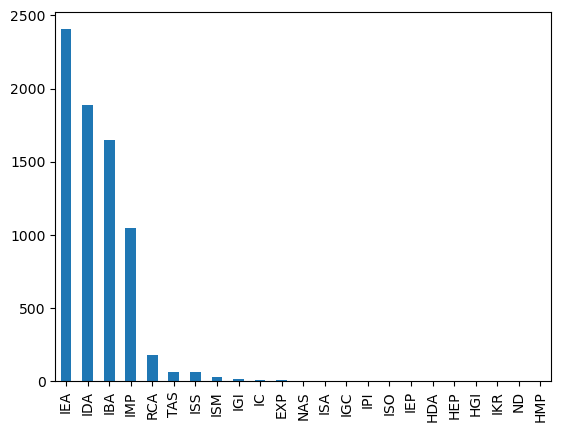

In [13]:
# filter for evidence code. how many samples do we lose?
go_annotations_tmtp.evidence_code.value_counts().plot.bar()


Most annotations have experimental evidence!

<AxesSubplot:>

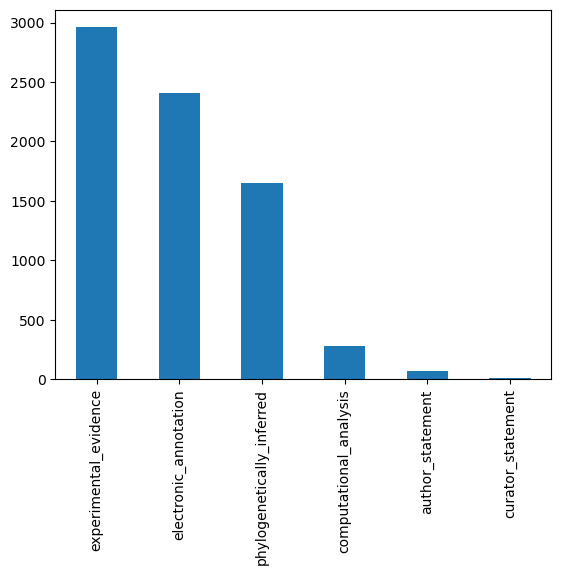

In [14]:
from subpred.ontology import EVIDENCE_CODE_TO_DESCRIPTION

go_annotations_tmtp.evidence_code.map(
    EVIDENCE_CODE_TO_DESCRIPTION
).value_counts().plot.bar()


Another point is that the GO annotation dataset also contains Uniprot annotations assigned by InterPro. There can be cases where the same annotation is in the dataset twice, where one of those annotations has an IEA annotation while the other one does not. What is the actual difference?

In [15]:
tmp = (
    go_annotations_tmtp[go_annotations_tmtp.evidence_code != "IEA"]
    .drop(["qualifier", "evidence_code", "aspect"], axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)
print(
    f"Without IEA terms: {tmp.shape[0]} annotations in {tmp.Uniprot.unique().shape[0]} proteins."
)
tmp = (
    go_annotations_tmtp.drop(["qualifier", "evidence_code", "aspect"], axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)
print(
    f"With IEA terms: {tmp.shape[0]} annotations in {tmp.Uniprot.unique().shape[0]} proteins."
)


Without IEA terms: 3348 annotations in 357 proteins.
With IEA terms: 4172 annotations in 470 proteins.


For now, we will filter out the IEA terms and only keep the verified data.

In [16]:
# filter for evidence codes:
go_annotations_tmtp = go_annotations_tmtp[
    go_annotations_tmtp.evidence_code != "IEA"
].reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A5A627,enables,IDA,F,GO:0015318,inorganic molecular entity transmembrane trans...
1,A5A627,enables,IDA,F,GO:0015103,inorganic anion transmembrane transporter acti...
2,A5A627,enables,IDA,F,GO:0005253,anion channel activity
3,A5A627,enables,IDA,F,GO:0005216,ion channel activity
4,A5A627,enables,IDA,F,GO:0022803,passive transmembrane transporter activity
...,...,...,...,...,...,...
4969,Q59385,enables,IBA,F,GO:0022857,transmembrane transporter activity
4970,Q59385,enables,IBA,F,GO:0015318,inorganic molecular entity transmembrane trans...
4971,Q59385,enables,IBA,F,GO:0046915,transition metal ion transmembrane transporter...
4972,Q59385,enables,IBA,F,GO:0042626,ATPase-coupled transmembrane transporter activity


Now, there are still some annotations left with identical uniprot accession and go term, but different evidence codes. This happens because the GO dataset contains annotations made both by Uniprot and by InterPro, and they can assign different evidence codes. The next step is to remove the columns that we no longer need, and delete duplicates:

In [17]:
go_annotations_tmtp = (
    go_annotations_tmtp.drop(["qualifier", "evidence_code", "aspect"], axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)
go_annotations_tmtp

,Uniprot,go_id,go_term
0,A5A627,GO:0015318,inorganic molecular entity transmembrane trans...
1,A5A627,GO:0015103,inorganic anion transmembrane transporter acti...
2,A5A627,GO:0005253,anion channel activity
3,A5A627,GO:0005216,ion channel activity
4,A5A627,GO:0022803,passive transmembrane transporter activity
...,...,...,...
3343,Q59385,GO:0022804,active transmembrane transporter activity
3344,Q59385,GO:0022853,active ion transmembrane transporter activity
3345,Q59385,GO:0019829,ATPase-coupled cation transmembrane transporte...
3346,Q59385,GO:0005375,copper ion transmembrane transporter activity


In [18]:
# make backup of entire (filtered) genome, since we need a reference set later for the annotations
sequences_all = sequences.copy()
sequences = sequences[sequences.index.isin(go_annotations_tmtp.Uniprot)]
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P02916,malF b4033 JW3993,Maltose/maltodextrin transport system permease...,True,1,MDVIKKKHWWQSDALKWSVLGLLGLLVGYLVVLMYAQGEYLFAITT...,83333
P03959,kdpA b0698 JW0686,Potassium-transporting ATPase potassium-bindin...,True,1,MAAQGFLLIATFLLVLMVLARPLGSGLARLINDIPLPGTTGVERVL...,83333
P05825,fepA fep feuB b0584 JW5086,Ferrienterobactin receptor (Enterobactin outer...,True,1,MNKKIHSLALLVNLGIYGVAQAQEPTDTPVSHDDTIVVTAAEQNLQ...,83333
P0AA78,exuT b3093 JW3064,Hexuronate transporter (Aldohexuronate transpo...,True,1,MRKIKGLRWYMIALVTLGTVLGYLTRNTVAAAAPTLMEELNISTQQ...,83333
P0AAD6,sdaC dcrA b2796 JW2767,Serine transporter SdaC (H(+)/L-serine symport...,True,1,METTQTSTIASKDSRSAWRKTDTMWMLGLYGTAIGAGVLFLPINAG...,83333
...,...,...,...,...,...,...
P77328,ybbY glxB4 b0513 JW0501,Putative purine permease YbbY,True,1,MFNFAVSRESLLSGFQWFFFIFCNTVVVPPTLLSAFQLPQSSLLTL...,83333
P76198,ydiN b1691 JW5274,Inner membrane transport protein YdiN,True,1,MSQNKAFSTPFILAVLCIYFSYFLHGISVITLAQNMSSLAEKFSTD...,83333
P33011,yeeA b2008 JW1990,Inner membrane protein YeeA,True,1,MRADKSLSPFEIRVYRHYRIVHGTRVALAFLLTFLIIRLFTIPEST...,83333


#### 

## Feature generation

Here, we will use PSSM and protein embeddings features to encode the protein sequences into vectors of length *n*.

### ProtNLM

One of the most reliable features at the moment seems to be ProtNLM, which provides NLP embeddings for individual proteins. Swissprot has pre-calculated embeddings for all *E. Coli* proteins available for download. 

There is also ProtT5, which can be calcualted for new proteins.

In [19]:
import h5py
import pandas as pd
import numpy as np


def read_uniprot_embedding(h5_path: str):
    with h5py.File(h5_path, "r") as file:
        embeddings_dict = {
            sequence_id: np.array(embedding) for sequence_id, embedding in file.items()
        }
        return pd.DataFrame.from_dict(embeddings_dict, orient="index")


feature_protnlm = read_uniprot_embedding("/home/ad/protnlm_test/ecoli-per-protein.h5")
feature_protnlm


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
A0A385XJ53,0.061157,0.082031,0.001612,0.039703,-0.020401,0.034180,-0.004898,-0.057495,0.023514,-0.089600,...,0.032349,-0.059021,-0.021179,-0.051971,0.054962,-0.005638,-0.088074,-0.094727,-0.043701,-0.071533
A0A385XJE6,0.047943,0.122864,0.007145,0.014442,0.024536,0.034729,-0.040802,-0.031281,0.009224,-0.065063,...,-0.004765,0.001526,0.021637,-0.024689,0.042328,-0.009949,-0.060638,-0.045258,-0.067078,0.024902
A0A385XJK5,0.050293,0.093811,-0.043182,-0.043671,-0.029007,-0.071594,0.019318,-0.126831,0.006989,-0.072693,...,0.045349,-0.014725,0.029755,-0.141113,-0.025711,0.098572,-0.029022,0.077271,-0.000576,-0.016922
A0A385XJL2,0.039551,0.090271,-0.019913,0.009315,-0.047882,-0.038605,0.059692,-0.034180,0.008598,-0.089661,...,0.049866,-0.025406,0.007912,-0.066223,0.031174,0.077637,0.030319,0.118652,0.055847,-0.060638
A0A385XJL4,0.008354,0.159546,0.024719,0.047485,0.031525,0.043854,-0.046173,-0.039490,0.017197,-0.031097,...,-0.040344,-0.025070,0.058197,-0.053284,0.074280,-0.032410,-0.082153,-0.038849,-0.109070,-0.011330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q93K97,0.043854,0.006367,-0.031769,0.036469,0.020828,0.040802,-0.007046,-0.109863,0.037109,-0.007458,...,-0.020798,0.034088,0.026230,-0.078735,0.013145,0.006065,-0.043488,-0.061035,-0.018387,-0.012543
Q9XB42,-0.001819,0.088806,-0.038422,0.023849,-0.067871,0.024200,0.062622,-0.184937,0.071777,0.039307,...,0.045532,-0.050568,-0.017609,-0.083496,-0.017700,0.008072,-0.038635,0.016205,0.038605,0.015205
Q9Z3A0,0.006672,0.109619,-0.061584,0.024643,-0.006783,-0.079468,-0.015144,-0.142212,0.071228,0.038208,...,0.029312,0.003822,0.022324,-0.174927,0.006115,0.036255,-0.054504,-0.008636,-0.030502,0.061249
U3PVA8,0.036987,-0.017639,-0.028152,-0.019852,0.025330,0.019958,0.012833,-0.129395,-0.018860,-0.003590,...,-0.029663,0.032928,0.026566,-0.147827,-0.055145,-0.061310,0.017197,0.147217,0.019318,-0.080444


**How many proteins in the dataset have embeddings available in the dataset?**


In [20]:
print(
    f"embeddings are available for {len(set(sequences.index) & set(feature_protnlm.index))}/{len(set(sequences.index))} of proteins in the dataset"
)


embeddings are available for 357/357 of proteins in the dataset


**Final feature dataset:**

In [21]:
feature_protnlm = feature_protnlm.loc[
    list(set(sequences.index) & set(feature_protnlm.index))
]
feature_protnlm


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
P03961,-0.027908,0.022720,0.024368,-0.004631,-0.003172,0.040039,-0.040833,-0.067566,0.006088,-0.057129,...,-0.027969,-0.006672,-0.039459,-0.048523,0.010719,-0.024551,-0.026382,-0.045837,-0.012474,0.033417
P56580,0.029922,0.080200,0.048737,0.027420,0.015083,0.028549,-0.008583,-0.062042,0.036591,0.011009,...,-0.044495,0.014893,0.020096,-0.069214,0.026398,-0.043365,-0.020004,0.018478,-0.012299,0.003052
P76397,-0.002268,0.038879,0.025665,0.034241,0.022339,-0.049194,-0.103149,-0.034912,0.024902,-0.011696,...,-0.014160,-0.004536,-0.014961,-0.008675,0.034363,-0.023682,-0.055756,-0.037994,-0.012169,0.027740
P0AAH0,0.043915,0.068237,-0.025314,0.039581,-0.013878,0.018387,-0.047119,-0.040009,-0.021240,-0.017715,...,-0.048309,0.012375,-0.051331,-0.080200,0.108398,-0.016739,-0.045990,-0.025574,-0.043854,0.025665
P07117,0.040924,0.170166,0.023865,0.041870,-0.006691,0.011330,-0.031769,-0.019913,0.010338,-0.060150,...,-0.037018,-0.025192,-0.023102,-0.012825,0.021698,-0.040710,-0.045349,-0.002460,-0.015793,-0.011841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P77308,0.028152,0.034607,-0.001821,0.026489,0.019714,-0.019623,0.001829,-0.024872,0.023071,-0.010658,...,-0.005348,0.005089,-0.004429,-0.070557,0.034973,-0.040710,-0.026428,-0.043945,0.012451,-0.015884
P02916,0.010300,0.080383,0.056885,0.034698,0.031525,0.022995,-0.030945,-0.037567,0.042816,-0.010796,...,-0.024963,-0.022446,-0.000171,-0.046082,0.042053,-0.053955,-0.039642,-0.031525,-0.041718,0.017944
P0AA60,0.030121,0.077637,0.030197,0.041077,0.006519,0.006325,-0.006943,-0.070923,0.021500,-0.017624,...,-0.019196,0.029724,0.041687,-0.076660,0.028290,-0.019257,0.002077,-0.041016,-0.059875,0.028793
P0AFC7,0.037506,0.049683,0.016068,0.044800,-0.003115,-0.011597,-0.018341,-0.036560,-0.007084,-0.056793,...,-0.037170,0.020020,-0.007965,-0.057831,0.048492,0.048645,-0.024277,0.021179,-0.020767,0.033417


### PSSM

At the moment, the PSSMs for Uniref90 with three iterations are still being calculated. We will use the Uniref50 PSSMs with three iterations as an example. We have only calculated PSSMs for proteins that are annotated with the GO term *transmembrane transporter activity* or one of its descendant GO terms, therefore we first have to filter for that. 

In [22]:
from subpred.pssm import calculate_pssm_feature

feature_pssm = calculate_pssm_feature(
    sequences=sequences.sequence,
    tmp_folder="../data/intermediate/blast/pssm_uniref50_3it/",
    blast_db="../data/raw/uniref/uniref50/uniref50.fasta",
    iterations=3,
    verbose=False,
)
feature_pssm


,AA,AR,AN,AD,AC,AQ,AE,AG,AH,AI,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
P02916,0.819672,0.370902,0.387295,0.325820,0.336066,0.397541,0.350410,0.530738,0.319672,0.497951,...,0.665984,0.415984,0.633197,0.594262,0.411885,0.510246,0.606557,0.446721,0.508197,0.725410
P03959,0.936430,0.342298,0.420538,0.322738,0.586797,0.386308,0.344743,0.616137,0.371638,0.501222,...,0.660147,0.337408,0.745721,0.647922,0.418093,0.559902,0.603912,0.518337,0.518337,0.792176
P05825,0.724662,0.339527,0.407095,0.371622,0.234797,0.385135,0.337838,0.530405,0.315878,0.378378,...,0.592905,0.290541,0.500000,0.530405,0.300676,0.398649,0.496622,0.427365,0.423986,0.717905
P0AA78,1.000000,0.050773,0.185430,0.000000,0.423841,0.161148,0.070640,0.724062,0.030905,0.596026,...,0.790287,0.384106,0.735099,0.688742,0.419426,0.551876,0.622517,0.571744,0.474614,0.805740
P0AAD6,0.787425,0.281437,0.419162,0.215569,0.541916,0.299401,0.251497,0.565868,0.323353,0.661677,...,0.703593,0.338323,0.706587,0.682635,0.356287,0.535928,0.568862,0.544910,0.592814,0.781437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P77328,0.739726,0.469178,0.493151,0.452055,0.559932,0.503425,0.460616,0.695205,0.457192,0.635274,...,0.691781,0.460616,0.698630,0.655822,0.503425,0.635274,0.667808,0.479452,0.515411,0.789384
P76198,0.817708,0.338542,0.361979,0.192708,0.447917,0.375000,0.257812,0.726562,0.291667,0.643229,...,0.768229,0.354167,0.789062,0.783854,0.403646,0.598958,0.679687,0.554688,0.549479,0.807292
P33011,0.790368,0.456091,0.368272,0.373938,0.456091,0.433428,0.424929,0.504249,0.416431,0.563739,...,0.708215,0.359773,0.594901,0.558074,0.362606,0.481586,0.572238,0.475921,0.475921,0.682720
P37327,0.878543,0.129555,0.178138,0.161943,0.364372,0.251012,0.194332,0.603239,0.165992,0.429150,...,0.647773,0.344130,0.639676,0.554656,0.348178,0.465587,0.599190,0.469636,0.461538,0.821862


## Annotation datasets

Here, we create gene/protein annotation datasets. Later, these annotations will be used for calculating enrichment in clusters.

### GO


Preprocessing:

In [23]:
go_annotations_uniprot = load_df("go")
    # filter for proteins in our e coli dataset
go_annotations_ecoli = go_annotations_uniprot[
    go_annotations_uniprot.Uniprot.isin(set(sequences_all.index.tolist()))
].reset_index(drop=True)
go_annotations_ecoli

,Uniprot,qualifier,go_id,evidence_code,aspect
0,A0A0A6YVN8,enables,GO:0046872,IEA,F
1,A5A615,located_in,GO:0005886,IDA,C
2,A5A615,located_in,GO:0005886,IEA,C
3,A5A615,located_in,GO:0005886,RCA,C
4,A5A615,located_in,GO:0016020,IEA,C
...,...,...,...,...,...
39610,Q93K97,involved_in,GO:0006753,IBA,P
39611,Q93K97,involved_in,GO:0019693,IBA,P
39612,Q93K97,is_active_in,GO:0005829,IBA,C
39613,Q93K97,located_in,GO:0005829,HDA,C


In [24]:
go_annotations_ecoli = add_go_ancestors(go_annotations_ecoli, go_owl=go_owl)
go_annotations_ecoli

,Uniprot,qualifier,evidence_code,aspect,go_id
0,A0A0A6YVN8,enables,IEA,F,GO:0043167
1,A0A0A6YVN8,enables,IEA,F,GO:0003674
2,A0A0A6YVN8,enables,IEA,F,GO:0043169
3,A0A0A6YVN8,enables,IEA,F,GO:0005488
4,A0A0A6YVN8,enables,IEA,F,GO:0046872
...,...,...,...,...,...
270350,Q93K97,located_in,HDA,C,GO:0110165
270351,Q93K97,located_in,HDA,C,GO:0005829
270352,Q93K97,located_in,IDA,C,GO:0005575
270353,Q93K97,located_in,IDA,C,GO:0110165


#### Evidence codes:

Only about 35% of annotations have evidence code IEA, and some of those might even have non-IEA duplicates in the dataset, since the annotations stem from multiple sources. We can remove the IEA terms.

Text(0, 0.5, 'percentage')

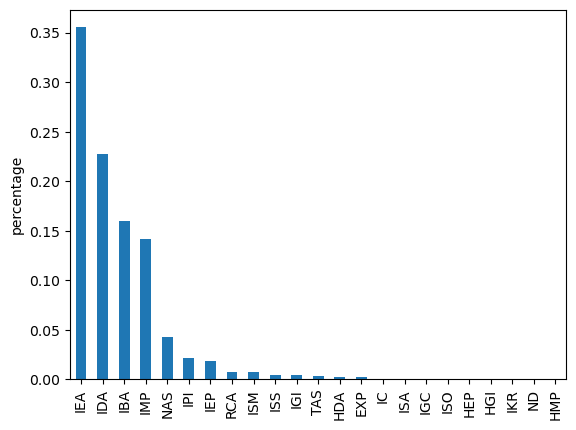

In [25]:
# filter/analyze evidence codes
g = go_annotations_ecoli.evidence_code.value_counts(normalize=True).plot.bar()
g.set_ylabel("percentage")

In [26]:
go_annotations_ecoli = (
    go_annotations_ecoli[go_annotations_ecoli.evidence_code != "IEA"]
    .drop("evidence_code", axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)
go_annotations_ecoli


,Uniprot,qualifier,aspect,go_id
0,A5A615,located_in,C,GO:0005575
1,A5A615,located_in,C,GO:0016020
2,A5A615,located_in,C,GO:0110165
3,A5A615,located_in,C,GO:0005886
4,A5A616,acts_upstream_of_or_within,P,GO:0008150
...,...,...,...,...
138480,Q93K97,is_active_in,C,GO:0110165
138481,Q93K97,is_active_in,C,GO:0005829
138482,Q93K97,located_in,C,GO:0005575
138483,Q93K97,located_in,C,GO:0110165


#### Qualifiers

- Contains some "NOT" qualifiers that have to be removed, otherwise okay.
- Some qualifiers represent inaccurate relations between genes and terms, they should be removed.
    - The most significant removed term is *acts_upstream_of_or_within*, which makes up more than 50% of biological process annotations. 

**Explanations of inaccurate relations:**

- **acts_upstream_of_or_within**: The acts upstream of or within annotation relation when the mechanism relating the gene product's activity to the Biological Process is not known. Annotations using this relation often come from mutant phenotypes for which further characterization has not been performed, but the authors wish to report the effect that the gene has on a process.
- **colocalizes_with**: where the resolution of an assay is not accurate enough to say that the gene product is a bona fide component member
- **contributes_to**: A gene product is associated with a GO Molecular Function term using the qualifier 'contributes to' when it is a member of a complex that is defined as an "irreducible molecular machine" - where a particular Molecular Function cannot be ascribed to an individual subunit or small set of subunits of a complex.
- **acts_upstream_of**: The acts upstream of gene product to GO term relation is used when the mechanism relating a gene product's activity to a Biological Process is known and the activity occurs before the Biological Process but is neither an integral part of the process, nor an integral part of a process that regulates it. Curators should always strive to use one of the more specific child relations that capture the directionality of the effect, either positive or negative.


In [27]:
for aspect in ["C", "P", "F"]:
    print("###", aspect)
    print(
        go_annotations_ecoli[go_annotations_ecoli.aspect == aspect]
        .qualifier.astype("str")
        .value_counts()
        .to_string()
    )

### C
located_in          11217
is_active_in         3364
part_of              2683
colocalizes_with        7
### P
acts_upstream_of_or_within        49569
involved_in                       41647
NOT|involved_in                      45
NOT|acts_upstream_of_or_within       17
acts_upstream_of                      8
### F
enables           29318
contributes_to      553
NOT|enables          57


In [28]:
go_annotations_ecoli = go_annotations_ecoli[
    ~go_annotations_ecoli.qualifier.str.startswith("NOT")
]
go_annotations_ecoli = go_annotations_ecoli[
    ~go_annotations_ecoli.qualifier.isin(
        [
            "contributes_to",
            "colocalizes_with",
            "acts_upstream_of",
            "acts_upstream_of_or_within",
        ]
    )
]
go_annotations_ecoli = go_annotations_ecoli.reset_index(drop=True)
go_annotations_ecoli.qualifier.astype("str").value_counts()

involved_in     41647
enables         29318
located_in      11217
is_active_in     3364
part_of          2683
Name: qualifier, dtype: int64

In [29]:
for aspect in ["C", "P", "F"]:
    print("###", aspect)
    print(
        go_annotations_ecoli[go_annotations_ecoli.aspect == aspect]
        .qualifier.astype("str")
        .value_counts()
        .to_string()
    )

### C
located_in      11217
is_active_in     3364
part_of          2683
### P
involved_in    41647
### F
enables    29318


There are two additional qualifiers for the cellular component annotations:

- **is_active_in**: The 'is active in' relation is used to relate a gene or gene product to the GO Cellular Component in which the gene or gene product enables its Molecular Function, e.g. ced-3 'is active in' cytosol. This indicates that the ced-3 gene product executes its molecular function in the cytosol.
- **part_of**: 'part of' is used to link gene products to protein-containing complexes when the gene product is an integral component of the protein-containing complex


The former could be interesting, we could filter the "transmembrane transporter activity" for genes that are actually active in the membrane, at least if enough proteins have that annotation. We should look at some examples for the latter, to get a picture of what that relation looks like in practice.

Are all proteins in E coli that are annotated with "transmembrane transporter activity" also "active_in" the membrane?

In [30]:
# TODO
proteins_transmembrane_transporter_activity_ecoli = go_annotations_ecoli[
    (go_annotations_ecoli.aspect == "F") & (go_annotations_ecoli.go_id == "GO:0022857")
].Uniprot.tolist()
print(
    "total number of transmembrane transporters: ",
    len(set(proteins_transmembrane_transporter_activity_ecoli)),
)
tmp = go_annotations_ecoli[
    go_annotations_ecoli.Uniprot.isin(proteins_transmembrane_transporter_activity_ecoli)
    & (go_annotations_ecoli.aspect == "C")
    & (go_annotations_ecoli.qualifier == "is_active_in")
]
tmp = tmp.assign(go_term=tmp.go_id.transform(go_owl.get_label))
print("transmembrane transporters with 'is_active_in' annotation:", tmp.Uniprot.unique().shape[0])
print("distribution of 'is_active_in' annotations:")
tmp.go_term.value_counts()

total number of transmembrane transporters:  357
transmembrane transporters with 'is_active_in' annotation: 120
distribution of 'is_active_in' annotations:


cellular_component                          120
cellular anatomical entity                  120
membrane                                    104
plasma membrane                              80
periplasmic space                            12
outer membrane-bounded periplasmic space     12
cell outer membrane                           9
outer membrane                                9
cell division site                            2
intracellular organelle                       1
membrane-bounded organelle                    1
organelle                                     1
intracellular membrane-bounded organelle      1
cytosol                                       1
Name: go_term, dtype: int64

It could be the case that this qualifier is simply not used in every instance where the relation would be most appropriate, or that the remaining terms are electronically annotated and not experimentally known (we removed IEA annotations). Or the majority of our transporters do not actively transport any substrates across the membrane and are instead part of protein complexes, or are actually upstream of the transport. 

What are some examples of transmembrane transport proteins without the "is_active_in" annotation or the "part_of" annotation?

In [31]:
tmp = go_annotations_ecoli[
    go_annotations_ecoli.Uniprot.isin(proteins_transmembrane_transporter_activity_ecoli)
    & (go_annotations_ecoli.aspect == "C")
    & (go_annotations_ecoli.qualifier == "located_in")
]
tmp = tmp.assign(go_term = tmp.go_id.transform(go_owl.get_label))
#TODO some weird proteins in there, maybe find some go term filters? or tcdb filter?
display(tmp.Uniprot.unique())
# tmp.Uniprot.unique()

sequences_all.loc[tmp.Uniprot.unique()]

# TODO GO enrichment analysis of this subset

<StringArray>
['A5A627', 'P00393', 'P00550', 'P02916', 'P02920', 'P02921', 'P02924',
 'P02930', 'P02931', 'P02943',
 ...
 'P77733', 'P77747', 'Q46817', 'Q46821', 'Q46839', 'Q46863', 'Q46916',
 'Q47142', 'Q47377', 'Q59385']
Length: 349, dtype: string

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
A5A627,tisB ysdB b4618 JW3649,Small toxic protein TisB (LexA-regulated prote...,True,1,MNLVDIAILILKLIVAALQLLDAVLKYLK,83333
P00393,ndh b1109 JW1095,Type II NADH:quinone oxidoreductase (EC 1.6.5....,True,1,MTTPLKKIVIVGGGAGGLEMATQLGHKLGRKKKAKITLVDRNHSHL...,83333
P00550,mtlA b3599 JW3573,PTS system mannitol-specific EIICBA component ...,True,1,MSSDIKIKVQSFGRFLSNMVMPNIGAFIAWGIITALFIPTGWLPNE...,83333
P02916,malF b4033 JW3993,Maltose/maltodextrin transport system permease...,True,1,MDVIKKKHWWQSDALKWSVLGLLGLLVGYLVVLMYAQGEYLFAITT...,83333
P02920,lacY b0343 JW0334,Lactose permease (Lactose-proton symport),True,1,MYYLKNTNFWMFGLFFFFYFFIMGAYFPFFPIWLHDINHISKSDTG...,83333
...,...,...,...,...,...,...
Q46863,ygiS b3020 JW2988,Probable deoxycholate-binding periplasmic prot...,True,1,MYTRNLLWLVSLVSAAPLYAADVPANTPLAPQQVFRYNNHSDPGTL...,83333
Q46916,gudP ygcZ b2789 JW2760,Probable galactarate/D-glucarate transporter GudP,True,1,MSSLSQAASSVEKRTNARYWIVVMLFIVTSFNYGDRATLSIAGSEM...,83333
Q47142,hcaT yfhS b2536 JW2520,Probable 3-phenylpropionic acid transporter,True,1,MVLQSTRWLALGYFTYFFSYGIFLPFWSVWLKGIGLTPETIGLLLG...,83333


Where are they located?

In [32]:
tmp.go_term.value_counts()

cellular_component                                                                      349
cellular anatomical entity                                                              327
membrane                                                                                309
plasma membrane                                                                         282
protein-containing complex                                                              143
membrane protein complex                                                                136
transporter complex                                                                     125
transmembrane transporter complex                                                       122
plasma membrane protein complex                                                          81
ATPase dependent transmembrane transport complex                                         73
ATP-binding cassette (ABC) transporter complex                                  

Interestingly, there are about 125 proteins that seem to be part of transporter protein complexes. If they do not show up during the clustering, we should look for ways to filter or classify them.

What are some examples of the part_of relation wrt cellular component annotations?

In [33]:
# TODO enrichment analysis
tmp = go_annotations_ecoli[
    go_annotations_ecoli.Uniprot.isin(proteins_transmembrane_transporter_activity_ecoli)
    & (go_annotations_ecoli.aspect == "C")
    & (go_annotations_ecoli.qualifier == "part_of")
]
tmp = tmp.assign(go_term = tmp.go_id.transform(go_owl.get_label)).reset_index(drop=True)
tmp

,Uniprot,qualifier,aspect,go_id,go_term
0,P00393,part_of,C,GO:0032991,protein-containing complex
1,P00393,part_of,C,GO:1990204,oxidoreductase complex
2,P00393,part_of,C,GO:0030964,NADH dehydrogenase complex
3,P00393,part_of,C,GO:1902494,catalytic complex
4,P00393,part_of,C,GO:0005575,cellular_component
...,...,...,...,...,...
682,P77463,part_of,C,GO:1990351,transporter complex
683,P77463,part_of,C,GO:0098797,plasma membrane protein complex
684,P77463,part_of,C,GO:0098533,ATPase dependent transmembrane transport complex
685,P77463,part_of,C,GO:0005575,cellular_component


#### Labels

Annotating the dataset with labels/names of GO terms:

In [34]:
go_annotations_ecoli = go_annotations_ecoli.assign(
    go_term=go_annotations_ecoli.go_id.map(go_owl.get_label)
)
go_annotations_ecoli

,Uniprot,qualifier,aspect,go_id,go_term
0,A5A615,located_in,C,GO:0005575,cellular_component
1,A5A615,located_in,C,GO:0016020,membrane
2,A5A615,located_in,C,GO:0110165,cellular anatomical entity
3,A5A615,located_in,C,GO:0005886,plasma membrane
4,A5A616,located_in,C,GO:0005575,cellular_component
...,...,...,...,...,...
88224,Q93K97,is_active_in,C,GO:0110165,cellular anatomical entity
88225,Q93K97,is_active_in,C,GO:0005829,cytosol
88226,Q93K97,located_in,C,GO:0005575,cellular_component
88227,Q93K97,located_in,C,GO:0110165,cellular anatomical entity


#### Records

Later, we will need the annotations as lists of tuples. Here, we create these lists for *E coli*:

### Keywords

In [35]:
keywords_uniprot = load_df("keywords")
keywords_ecoli = (
    keywords_uniprot[keywords_uniprot.Uniprot.isin(sequences_all.index)]
    .drop_duplicates()
    .reset_index(drop=True)
)
keywords_ecoli

,Uniprot,keyword
0,P00509,3D-structure
1,P00509,Aminotransferase
2,P00509,Cytoplasm
3,P00509,Direct protein sequencing
4,P00509,Pyridoxal phosphate
...,...,...
23130,P0AEG8,Reference proteome
23131,P33668,Reference proteome
23132,P33668,Signal
23133,A0A0A6YVN8,3D-structure


### Interpro

In [36]:
interpro_all = load_df("interpro")
interpro_ecoli = interpro_all[
    interpro_all.Uniprot.isin(sequences_all.index)
].reset_index(drop=True)
interpro_ecoli


,Uniprot,interpro_id
0,P00509,IPR004839
1,P00509,IPR000796
2,P00509,IPR004838
3,P00509,IPR015424
4,P00509,IPR015421
...,...,...
12755,P77296,IPR011990
12756,P0AEG8,IPR019717
12757,P33668,IPR028921
12758,A0A0A6YVN8,IPR036237


### TCDB

In [37]:
tcdb_all = load_df("tcdb_substrates")
tcdb_ecoli = (
    tcdb_all[
        (tcdb_all.variable == "Uniprot") & (tcdb_all.value.isin(sequences_all.index))
    ]
    .drop_duplicates()
    .reset_index(drop=True)
    .drop("variable", axis=1)
    .rename(columns={"value": "Uniprot"})[["Uniprot", "tcdb_id"]]
)
tcdb_ecoli


,Uniprot,tcdb_id
0,P00803,9.B.391.1.3
1,P02916,3.A.1.1.1
2,P02925,3.A.1.2.1
3,P02929,2.C.1.1.1
4,P03959,3.A.3.7.1
...,...,...
702,Q46909,2.A.1.1.95
703,P28303,2.A.66.1.4
704,C1P611,1.C.135.1.1
705,P23481,3.D.1.9.1


### Records

Finally, we transform the dataframes into lists of tuples, so they work with the refactored enrichment analysis method

In [39]:
records_kw = keywords_ecoli.to_records(index=False).tolist()

records_go_cc = (
    go_annotations_ecoli[go_annotations_ecoli.aspect == "C"]
    .drop(["qualifier", "go_id", "aspect"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
records_go_mf = (
    go_annotations_ecoli[go_annotations_ecoli.aspect == "F"]
    .drop(["qualifier", "go_id", "aspect"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
records_go_bp = (
    go_annotations_ecoli[go_annotations_ecoli.aspect == "P"]
    .drop(["qualifier", "go_id", "aspect"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
records_go_all = (
    go_annotations_ecoli.drop(["qualifier", "go_id", "aspect"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)

records_tcdb_class = (
    tcdb_ecoli.assign(tcdb_class=tcdb_ecoli.tcdb_id.transform(lambda x: x[:3]))[
        ["Uniprot", "tcdb_class"]
    ]
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
records_tcdb_mechanism = (
    tcdb_ecoli.assign(tcdb_class=tcdb_ecoli.tcdb_id.transform(lambda x: x[:1]))[
        ["Uniprot", "tcdb_class"]
    ]
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)

records_interpro = interpro_ecoli.drop_duplicates().to_records(index=False).tolist()


Dictionary of all annotation lists:

In [56]:
records_all_dict = {
    "Keywords": records_kw,
    "GO Cellular Component": records_go_cc,
    "GO Molecular Function": records_go_mf,
    "GO Biological Process": records_go_bp,
    # "All GO terms": records_go_all,
    "TCDB Class": records_tcdb_class,
    "TCDB Mechanism": records_tcdb_mechanism,
    "Interpro Domains": records_interpro,
}


## Kmeans Clustering

First, we will try to cluster the entire dataset with k-means clustering. 

What is the optimal number *k* of clusters? There are four metrics that are commonly used to estimate clustering quality for different *k*:

- **Elbow plot/Inertia**: the more it looks like an elbow, the better. the optimal number of clusters is at the "joint of the arm"
- **Silhouette**: Number between -1 and 1. The higher the better. Measures tightness/overlap of clusters
- **Calinsky Harabasz**: Higher score is better
- **Davies Boldin**: The closer to 0 the better. Average similarity between any cluster and its closest cluster.

In [41]:
from subpred.clustering import clustering_quality_plots

#### For PSSM Feature:

Here, we are using PSSMs generated from Uniref50, with 3 iterations of Psiblast. These PSSMs often yielded the best results in Manuscript 1.

array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

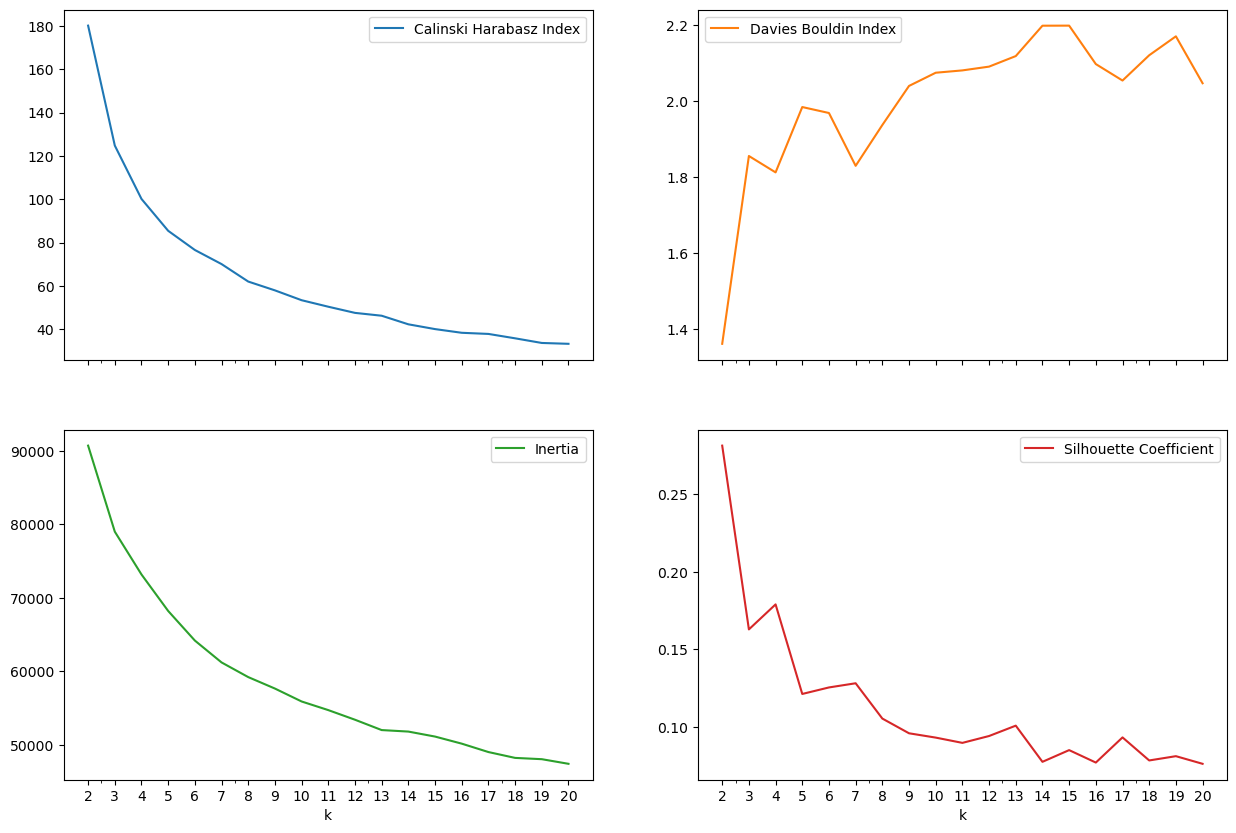

In [42]:
clustering_quality_plots(feature_pssm)

The elbow plot could look better, and the other scores point towards k=2.

#### ProtNLM feature:

This feature was provided by Uniprot, and calculated in collaboration with Google Research. Each protein sequence is transformed into a word embedding, a vector of length 1024.

array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

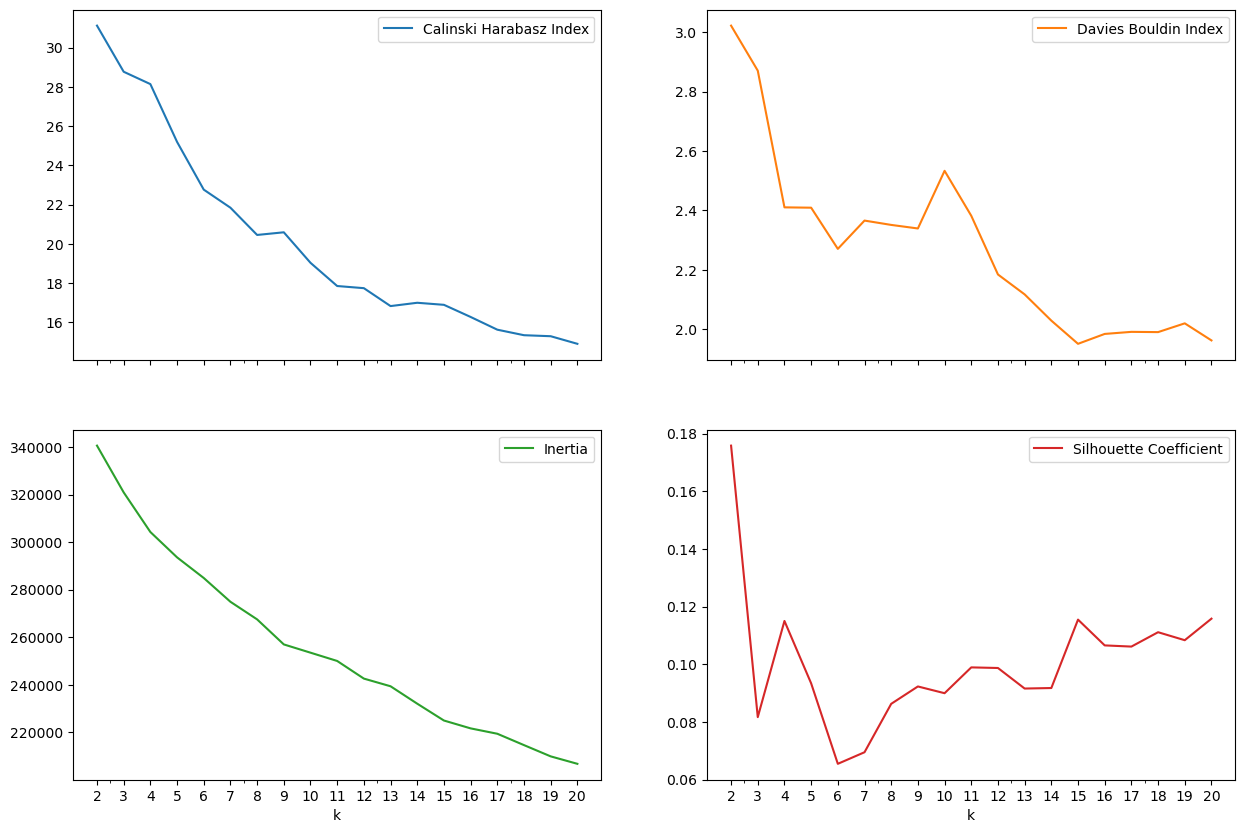

In [43]:
clustering_quality_plots(feature_protnlm)

It actually looks like PSSM feature works better for clustering. We should look at a dendrogram to see what the data looks like.

## Hierarchical clustering using PSSMs

We will try hierarchical clustering first in order to find good annotations to create clusters, then try KMeans again. The clustering looks better when using PSSM instead of embeddings.

Here, we are using Ward clustering. Other methods, like the "single" or "centroid" methods, could be useful later for removing outliers from the individual clusters.

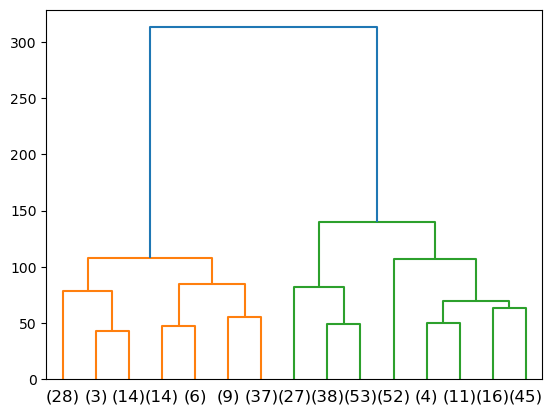

In [58]:
from subpred.clustering import get_linkage, dendrogram_plot, get_cluster_labels

linkage = get_linkage(feature_pssm)
dendrogram = dendrogram_plot(linkage, max_leaves=15)

There seem to be two cluster that can be easily distinguished with Ward-Clustering and PSSM feature. What are they?

#### Analyzing the two clusters


In [50]:
labels_twoclusters = get_cluster_labels(linkage, n_clusters=2, index=feature_pssm.index.tolist())
labels_twoclusters.value_counts()

2    246
1    111
dtype: int64

Cluster 1 contains roughly half as many proteins as cluster 2.

##### Enrichment analysis

For each cluster, we use a hypergeometric test to calculate p-values. The log fold change is calculated as well, and the percentage of proteins annotated with the annotation that are part of in the cluster. 

Only entries with FDR-adjusted p-value < 0.05 are shown here.

We used the set of transmembrane transport proteins as the reference set for the hypergeometric test, instead of the all the proteins in the genome. If we would use the entire genome instead, then the most significiantly enriched annotations would be related to transmembrane transport, since that is what we filtered the subset for.

In [62]:
from subpred.enrichment_analysis import cluster_enrichment_analysis

reference_set_transmembrane_transporters = set(sequences.index.unique().to_list())
reference_set_whole_genome = set(sequences_all.index.unique().to_list())

cluster_enrichment_analysis(
    cluster_labels=labels_twoclusters, reference_set=reference_set_transmembrane_transporters, annotations_dict=records_all_dict, p_cutoff=0.05
)

CLUSTER 1
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Signal,357,46,111,38,14.302521,82.61,1.409730,1.026404e-14,9.853483e-13,9.853483e-13
1,Direct protein sequencing,357,55,111,37,17.100840,67.27,1.113458,1.681339e-09,8.070427e-08,1.614085e-07
2,Cell outer membrane,357,27,111,23,8.394958,85.19,1.454039,2.078635e-09,5.701398e-08,1.995489e-07
3,Transmembrane beta strand,357,27,111,23,8.394958,85.19,1.454039,2.078635e-09,5.701398e-08,1.995489e-07
4,3D-structure,357,116,111,58,36.067227,50.00,0.685364,1.242733e-07,2.386048e-06,1.193024e-05
5,Periplasm,357,10,111,9,3.109244,90.00,1.533361,1.586527e-04,2.343179e-03,1.523066e-02
6,Disulfide bond,357,10,111,9,3.109244,90.00,1.533361,1.586527e-04,2.343179e-03,1.523066e-02
7,TonB box,357,6,111,6,1.865546,100.00,1.685364,8.214637e-04,9.277707e-03,7.886051e-02
8,Fimbrium biogenesis,357,6,111,6,1.865546,100.00,1.685364,8.214637e-04,9.277707e-03,7.886051e-02
9,Translocase,357,37,111,20,11.504202,54.05,0.797839,1.844908e-03,1.771112e-02,1.771112e-01


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,cell outer membrane,357,27,111,23,8.394958,85.19,1.454039,2.078635e-09,9.145993e-08,1.371899e-07
1,outer membrane,357,27,111,23,8.394958,85.19,1.454039,2.078635e-09,9.145993e-08,1.371899e-07
2,periplasmic space,357,16,111,14,4.974790,87.50,1.492719,2.822946e-06,5.323269e-05,1.863144e-04
3,outer membrane-bounded periplasmic space,357,16,111,14,4.974790,87.50,1.492719,2.822946e-06,5.323269e-05,1.863144e-04
4,protein-containing complex,357,155,111,63,48.193277,40.65,0.386520,4.930142e-04,6.507788e-03,3.253894e-02
5,membrane protein complex,357,147,111,60,45.705882,40.82,0.392583,7.039776e-04,7.743754e-03,4.646252e-02


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,binding,357,119,111,59,37.000000,49.58,0.673190,1.321832e-07,0.000037,0.000037
1,porin activity,357,19,111,15,5.907563,78.95,1.344327,1.399789e-05,0.001579,0.003947
2,wide pore channel activity,357,19,111,15,5.907563,78.95,1.344327,1.399789e-05,0.001579,0.003947
3,passive transmembrane transporter activity,357,44,111,26,13.680672,59.09,0.926372,3.727963e-05,0.002336,0.010513
4,channel activity,357,44,111,26,13.680672,59.09,0.926372,3.727963e-05,0.002336,0.010513
5,protein binding,357,77,111,38,23.941176,49.35,0.666505,1.158074e-04,0.005443,0.032658
6,identical protein binding,357,27,111,17,8.394958,62.96,1.017940,3.837330e-04,0.015459,0.108213
7,siderophore uptake transmembrane transporter a...,357,6,111,6,1.865546,100.00,1.685364,8.214637e-04,0.027253,0.231653
8,fimbrial usher porin activity,357,6,111,6,1.865546,100.00,1.685364,8.214637e-04,0.027253,0.231653
9,organic cyclic compound binding,357,38,111,21,11.815126,55.26,0.829754,9.280026e-04,0.024923,0.261697


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1.B,357,25,111,21,7.773109,84.0,1.433826,2.070293e-08,1.863264e-07,1.863264e-07


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1,357,42,111,30,13.058824,71.43,1.199938,1.093920e-08,6.563519e-08,6.563519e-08
1,3,357,103,111,43,32.025210,41.75,0.425129,4.484665e-03,1.345399e-02,2.690799e-02


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,IPR030678,357,8,111,8,2.487395,100.00,1.685364,0.000073,0.018401,0.018401
1,IPR039424,357,9,111,8,2.798319,88.89,1.515439,0.000485,0.048865,0.122162
2,IPR000914,357,9,111,8,2.798319,88.89,1.515439,0.000485,0.048865,0.122162
3,IPR012910,357,6,111,6,1.865546,100.00,1.685364,0.000821,0.021790,0.207009
4,IPR037066,357,6,111,6,1.865546,100.00,1.685364,0.000821,0.021790,0.207009
5,IPR000531,357,6,111,6,1.865546,100.00,1.685364,0.000821,0.021790,0.207009
6,IPR036942,357,6,111,6,1.865546,100.00,1.685364,0.000821,0.021790,0.207009
7,IPR023765,357,6,111,6,1.865546,100.00,1.685364,0.000821,0.021790,0.207009
8,IPR000015,357,6,111,6,1.865546,100.00,1.685364,0.000821,0.021790,0.207009
9,IPR018030,357,6,111,6,1.865546,100.00,1.685364,0.000821,0.021790,0.207009


CLUSTER 2
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Transmembrane helix,357,268,246,215,184.672269,80.22,0.219369,7.861795e-15,8.883828e-13,8.883828e-13
1,Cell membrane,357,304,246,228,209.478992,75.00,0.122228,1.236558e-08,6.986555e-07,1.397311e-06
2,Cell inner membrane,357,302,246,226,208.100840,74.83,0.119040,5.559409e-08,2.094044e-06,6.282133e-06
3,Transmembrane,357,295,246,219,203.277311,74.24,0.107482,4.322393e-06,1.221076e-04,4.884304e-04
4,Symport,357,51,246,45,35.142857,88.24,0.356694,5.692928e-04,1.286602e-02,6.433009e-02
5,Antiport,357,19,246,19,13.092437,100.00,0.537266,6.745755e-04,1.270451e-02,7.622703e-02


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,plasma membrane,357,285,246,222,196.386555,77.89,0.176864,2.190972e-12,1.424132e-10,1.424132e-10
1,membrane,357,316,246,228,217.747899,72.15,0.066375,3.653903e-04,1.187518e-02,2.375037e-02


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,secondary active transmembrane transporter act...,357,88,246,76,60.638655,86.36,0.325762,0.000017,0.006927,0.006927


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2.A,357,152,246,133,104.739496,87.5,0.344621,1.484410e-11,1.187528e-10,1.187528e-10


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2,357,152,246,133,104.739496,87.5,0.344621,1.484410e-11,7.422050e-11,7.422050e-11


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


It looks like the first cluster contains channels and pores, some of which are located in the outer membrane. It also contains active proteins (TCDB mechanism 3), and proteins that are part of membrane protein complexes. Also there are some strongly enriched domains, although only few proteins are annotated with them. 

Cluster 2 contains 86% of the secondary active transporters, and 87% of the proteins in TCDB class 2.A . The majority of the proteins is located on the inner membrane, and has helical structure. It contains every antiporter, and 88% of the symporters.


So far, the two clusters are clearly distinguishable, but the separation is not 100% perfect for any annotation. Cluster 1 sill contains about 15% of the inner membrane proteins, and cluster 2 contains 15% (i.e. four) of the outer membrane proteins. 

#### Four clusters

If we look at the dendrogram again, we should divide both clusters into two clusters each, if we separate the entire dataset into four clusters. 

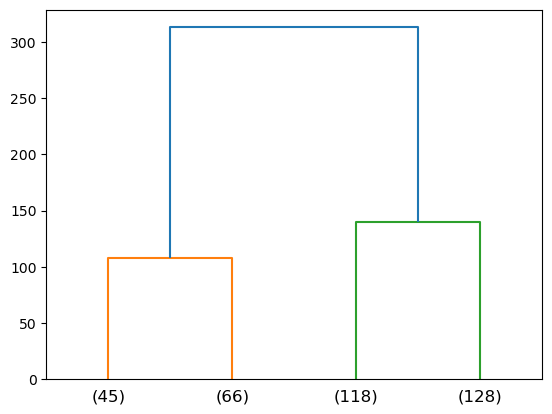

In [60]:
dendrogram = dendrogram_plot(linkage, max_leaves=4)

Clusters 1 is now divided into the new clusters 1 and 2, while the old cluster 2 is now clusters 3 and 4.

In [61]:
labels_fourclusters = get_cluster_labels(linkage, n_clusters=4, index=feature_pssm.index.tolist())
labels_fourclusters.value_counts()

4    128
3    118
2     66
1     45
dtype: int64

In [71]:
# TODO analysis!
# Problem: The clusters still contain small outliers.
cluster_enrichment_analysis(cluster_labels=labels_fourclusters, reference_set=reference_set_transmembrane_transporters, annotations_dict=records_all_dict, p_cutoff=0.05)

CLUSTER 1
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Cell inner membrane,357,302,45,45,38.067227,14.90,0.241376,0.000308,0.018796,0.018796
1,Cell membrane,357,304,45,45,38.319328,14.80,0.231853,0.000425,0.012955,0.025910
2,3D-structure,357,116,45,25,14.621849,21.55,0.773802,0.000541,0.011003,0.033010
3,Transmembrane helix,357,268,45,42,33.781513,15.67,0.314155,0.000916,0.013964,0.055856


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,plasma membrane,357,285,45,44,35.924370,15.44,0.292541,0.000264,0.009238,0.009238
1,oxidoreductase complex,357,11,45,6,1.386555,54.55,2.113458,0.000828,0.014482,0.028963
2,catalytic complex,357,12,45,6,1.512605,50.00,1.987927,0.001497,0.017469,0.052406


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,generation of precursor metabolites and energy,357,10,45,6,1.260504,60.0,2.250962,0.000416,0.046982,0.093964
1,electron transport chain,357,10,45,6,1.260504,60.0,2.250962,0.000416,0.046982,0.093964
2,respiratory electron transport chain,357,10,45,6,1.260504,60.0,2.250962,0.000416,0.046982,0.093964
3,energy derivation by oxidation of organic comp...,357,5,45,4,0.630252,80.0,2.665999,0.001015,0.038248,0.229487
4,aerobic respiration,357,5,45,4,0.630252,80.0,2.665999,0.001015,0.038248,0.229487
5,cellular respiration,357,5,45,4,0.630252,80.0,2.665999,0.001015,0.038248,0.229487
6,electron transport coupled proton transport,357,5,45,4,0.630252,80.0,2.665999,0.001015,0.038248,0.229487
7,"energy coupled proton transmembrane transport,...",357,5,45,4,0.630252,80.0,2.665999,0.001015,0.038248,0.229487


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3.D,357,10,45,6,1.260504,60.0,2.250962,0.000416,0.003326,0.003326


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


CLUSTER 2
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Signal,357,46,66,36,8.504202,78.26,2.081749,2.509921e-22,1.882441e-20,1.882441e-20
1,Cell outer membrane,357,27,66,23,4.991597,85.19,2.204061,3.735733e-15,1.120720e-13,2.801800e-13
2,Transmembrane beta strand,357,27,66,23,4.991597,85.19,2.204061,3.735733e-15,1.120720e-13,2.801800e-13
3,Direct protein sequencing,357,55,66,27,10.168067,49.09,1.408914,9.833544e-09,1.843790e-07,7.375158e-07
4,Periplasm,357,10,66,9,1.848739,90.00,2.283383,1.345864e-06,1.835269e-05,1.009398e-04
5,Disulfide bond,357,10,66,9,1.848739,90.00,2.283383,1.345864e-06,1.835269e-05,1.009398e-04
6,ATP-binding,357,42,66,20,7.764706,47.62,1.364997,3.310541e-06,3.547008e-05,2.482906e-04
7,Nucleotide-binding,357,44,66,20,8.134454,45.45,1.297883,8.443522e-06,7.915802e-05,6.332642e-04
8,TonB box,357,6,66,6,1.109244,100.00,2.435386,3.296341e-05,2.602375e-04,2.472256e-03
9,Fimbrium biogenesis,357,6,66,6,1.109244,100.00,2.435386,3.296341e-05,2.602375e-04,2.472256e-03


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,cell outer membrane,357,27,66,22,4.991597,81.48,2.139930,1.130564e-13,4.070030e-12,6.105044e-12
1,outer membrane,357,27,66,22,4.991597,81.48,2.139930,1.130564e-13,4.070030e-12,6.105044e-12
2,periplasmic space,357,16,66,14,2.957983,87.50,2.242741,1.414229e-09,2.181953e-08,7.636836e-08
3,outer membrane-bounded periplasmic space,357,16,66,14,2.957983,87.50,2.242741,1.414229e-09,2.181953e-08,7.636836e-08
4,membrane protein complex,357,147,66,45,27.176471,30.61,0.727567,8.904808e-07,9.617193e-06,4.808597e-05
5,protein-containing complex,357,155,66,46,28.655462,29.68,0.682824,1.766584e-06,1.589926e-05,9.539555e-05
6,transporter complex,357,130,66,37,24.033613,28.46,0.622472,2.533416e-04,1.954349e-03,1.368044e-02
7,transmembrane transporter complex,357,127,66,36,23.478992,28.35,0.616626,3.813533e-04,2.574135e-03,2.059308e-02
8,ATP-binding cassette (ABC) transporter complex...,357,63,66,22,11.647059,34.92,0.917538,4.302753e-04,2.581652e-03,2.323487e-02
9,ATPase dependent transmembrane transport complex,357,81,66,25,14.974790,30.86,0.739392,1.423236e-03,7.685473e-03,7.685473e-02


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,binding,357,119,66,45,22.000000,37.82,1.032421,1.177922e-10,2.379402e-08,2.379402e-08
1,porin activity,357,19,66,15,3.512605,78.95,2.094349,5.135662e-09,4.149615e-07,1.037404e-06
2,wide pore channel activity,357,19,66,15,3.512605,78.95,2.094349,5.135662e-09,4.149615e-07,1.037404e-06
3,ion binding,357,47,66,22,8.689076,46.81,1.340229,1.269099e-06,6.408948e-05,2.563579e-04
4,carbohydrate derivative binding,357,37,66,19,6.840336,51.35,1.473860,1.410170e-06,5.697088e-05,2.848544e-04
5,organic cyclic compound binding,357,38,66,19,7.025210,50.00,1.435386,2.431397e-06,7.556035e-05,4.911423e-04
6,heterocyclic compound binding,357,38,66,19,7.025210,50.00,1.435386,2.431397e-06,7.556035e-05,4.911423e-04
7,small molecule binding,357,36,66,18,6.655462,50.00,1.435386,4.906263e-06,1.238831e-04,9.910651e-04
8,anion binding,357,37,66,18,6.840336,48.65,1.395858,8.218351e-06,1.844563e-04,1.660107e-03
9,passive transmembrane transporter activity,357,44,66,20,8.134454,45.45,1.297883,8.443522e-06,1.624373e-04,1.705592e-03


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,cellular component assembly,357,10,66,9,1.848739,90.00,2.283383,0.000001,0.000357,0.000357
1,cell projection organization,357,6,66,6,1.109244,100.00,2.435386,0.000033,0.002496,0.008735
2,pilus organization,357,6,66,6,1.109244,100.00,2.435386,0.000033,0.002496,0.008735
3,cell projection assembly,357,6,66,6,1.109244,100.00,2.435386,0.000033,0.002496,0.008735
4,pilus assembly,357,6,66,6,1.109244,100.00,2.435386,0.000033,0.002496,0.008735
5,cellular component organization or biogenesis,357,13,66,9,2.403361,69.23,1.904871,0.000060,0.002429,0.015791
6,cellular component organization,357,13,66,9,2.403361,69.23,1.904871,0.000060,0.002429,0.015791
7,iron ion transmembrane transport,357,10,66,7,1.848739,70.00,1.920813,0.000419,0.013879,0.111033


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1.B,357,25,66,21,4.621849,84.00,2.183847,1.499811e-13,7.499054e-13,7.499054e-13
1,3.A,357,93,66,29,17.193277,31.18,0.754208,3.512964e-04,8.782409e-04,1.756482e-03


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1,357,42,66,24,7.764706,57.14,1.628031,1.521792e-09,6.087168e-09,6.087168e-09
1,3,357,103,66,29,19.042017,28.16,0.606867,2.748784e-03,5.497568e-03,1.099514e-02


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,IPR030678,357,8,66,8,1.478992,100.00,2.435386,9.498614e-07,0.000127,0.000127
1,IPR003593,357,36,66,18,6.655462,50.00,1.435386,4.906263e-06,0.000329,0.000657
2,IPR039424,357,9,66,8,1.663866,88.89,2.265461,7.285900e-06,0.000279,0.000976
3,IPR000914,357,9,66,8,1.663866,88.89,2.265461,7.285900e-06,0.000279,0.000976
4,IPR027417,357,38,66,18,7.025210,47.37,1.357384,1.342661e-05,0.000360,0.001799
5,IPR003439,357,35,66,17,6.470588,48.57,1.393566,1.635775e-05,0.000365,0.002192
6,IPR017871,357,32,66,16,5.915966,50.00,1.435386,1.937052e-05,0.000371,0.002596
7,IPR012910,357,6,66,6,1.109244,100.00,2.435386,3.296341e-05,0.000327,0.004417
8,IPR037066,357,6,66,6,1.109244,100.00,2.435386,3.296341e-05,0.000327,0.004417
9,IPR000531,357,6,66,6,1.109244,100.00,2.435386,3.296341e-05,0.000327,0.004417


CLUSTER 3
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Transmembrane helix,357,268,118,118,88.582633,44.03,0.413691,3.160906e-19,2.275852e-17,2.275852e-17
1,Transmembrane,357,295,118,118,97.507003,40.00,0.275209,7.320306e-13,2.635310e-11,5.270620e-11
2,Cell membrane,357,304,118,118,100.481793,38.82,0.231853,6.580012e-11,1.579203e-09,4.737608e-09
3,Cell inner membrane,357,302,118,116,99.820728,38.41,0.216713,1.553242e-08,2.795835e-07,1.118334e-06
4,Membrane,357,331,118,118,109.406162,35.65,0.109093,1.825299e-05,2.628431e-04,1.314216e-03
5,Symport,357,51,118,26,16.857143,50.98,0.625152,3.272024e-03,3.926428e-02,2.355857e-01


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,plasma membrane,357,285,118,118,94.201681,41.40,0.324962,3.986291e-15,1.395202e-13,1.395202e-13
1,membrane,357,316,118,118,104.448179,37.34,0.176000,2.043211e-08,3.575619e-07,7.151238e-07
2,cellular anatomical entity,357,334,118,118,110.397759,35.33,0.096076,6.781986e-05,7.912317e-04,2.373695e-03


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,secondary active transmembrane transporter act...,357,88,118,51,29.086835,57.95,0.810131,2.200118e-08,0.000005,0.000005
1,symporter activity,357,51,118,31,16.857143,60.78,0.878908,1.028833e-05,0.001281,0.002562
2,solute:cation symporter activity,357,43,118,27,14.212885,62.79,0.925760,1.930407e-05,0.001602,0.004807
3,active ion transmembrane transporter activity,357,83,118,41,27.434174,49.40,0.579650,3.132826e-04,0.019502,0.078007
4,solute:proton symporter activity,357,32,118,20,10.577031,62.50,0.919065,3.328999e-04,0.016578,0.082892


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2.A,357,152,118,89,50.240896,58.55,0.824943,6.477707e-19,3.238854e-18,3.238854e-18


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2,357,152,118,89,50.240896,58.55,0.824943,6.477707e-19,2.591083e-18,2.591083e-18


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,IPR036259,357,46,118,29,15.204482,63.04,0.931556,0.000008,0.001077,0.001077
1,IPR011701,357,31,118,21,10.246499,67.74,1.035258,0.000038,0.002684,0.005367
2,IPR020846,357,42,118,26,13.882353,61.90,0.905260,0.000042,0.002005,0.006016
3,IPR037294,357,7,118,7,2.313725,100.00,1.597137,0.000381,0.013637,0.054549
4,IPR000522,357,6,118,6,1.983193,100.00,1.597137,0.001195,0.034191,0.170953


CLUSTER 4
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Phosphoprotein,357,22,128,16,7.887955,72.73,1.020349,0.000318,0.029252,0.029252
1,Transferase,357,23,128,16,8.246499,69.57,0.956218,0.000720,0.033119,0.066239


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,plasma membrane protein complex,357,91,128,44,32.627451,48.35,0.431417,0.003204,0.049665,0.198661


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,4.A,357,25,128,16,8.963585,64.0,0.835924,0.002848,0.019935,0.019935


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,4,357,25,128,16,8.963585,64.0,0.835924,0.002848,0.014239,0.014239


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,IPR000515,357,21,128,17,7.529412,80.95,1.174926,0.000018,0.002795,0.004193
1,IPR035906,357,21,128,17,7.529412,80.95,1.174926,0.000018,0.002795,0.004193


### 8 Clusters

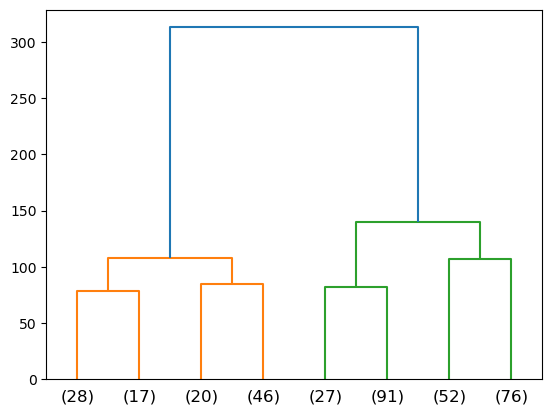

CLUSTER 1
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Transmembrane helix,357,268,28,28,21.019608,10.45,0.413691,0.000224,0.008966,0.008966
1,Transmembrane,357,295,28,28,23.137255,9.49,0.275209,0.003783,0.075654,0.151307
2,Cell inner membrane,357,302,28,28,23.686275,9.27,0.241376,0.007529,0.100385,0.301154
3,Cell membrane,357,304,28,28,23.843137,9.21,0.231853,0.009137,0.091370,0.365479
4,3D-structure,357,116,28,15,9.098039,12.93,0.721335,0.013420,0.107357,0.536783
5,Lipid-binding,357,1,28,1,0.078431,100.00,3.672425,0.078431,0.448179,1.000000
6,Glycerol metabolism,357,1,28,1,0.078431,100.00,3.672425,0.078431,0.448179,1.000000
7,Toxin-antitoxin system,357,1,28,1,0.078431,100.00,3.672425,0.078431,0.448179,1.000000
8,Membrane,357,331,28,28,25.960784,8.46,0.109093,0.110231,0.489913,1.000000
9,Sugar transport,357,56,28,7,4.392157,12.50,0.672425,0.128761,0.515042,1.000000


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,plasma membrane,357,285,28,27,22.352941,9.47,0.272495,0.012099,0.350875,0.350875
1,membrane,357,316,28,27,24.784314,8.54,0.123532,0.141236,1.000000,1.000000
2,"proton-transporting two-sector ATPase complex,...",357,3,28,1,0.235294,33.33,2.087463,0.217884,1.000000,1.000000
3,"proton-transporting ATP synthase complex, coup...",357,3,28,1,0.235294,33.33,2.087463,0.217884,1.000000,1.000000
4,cell envelope Sec protein transport complex,357,4,28,1,0.313725,25.00,1.672425,0.279747,1.000000,1.000000
5,intracellular protein-containing complex,357,4,28,1,0.313725,25.00,1.672425,0.279747,1.000000,1.000000
6,potassium ion-transporting ATPase complex,357,4,28,1,0.313725,25.00,1.672425,0.279747,1.000000,1.000000
7,cation-transporting ATPase complex,357,4,28,1,0.313725,25.00,1.672425,0.279747,1.000000,1.000000
8,potassium:proton antiporter complex,357,5,28,1,0.392157,20.00,1.350497,0.336877,1.000000,1.000000
9,respiratory chain complex,357,6,28,1,0.470588,16.67,1.087463,0.389626,1.000000,1.000000


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,L-phenylalanine transmembrane transporter acti...,357,2,28,2,0.156863,100.00,3.672425,0.005948,0.808989,0.808989
1,inorganic anion transmembrane transporter acti...,357,15,28,4,1.176471,26.67,1.765535,0.022716,1.000000,1.000000
2,solute:inorganic anion antiporter activity,357,5,28,2,0.392157,40.00,2.350497,0.051224,1.000000,1.000000
3,anion transmembrane transporter activity,357,78,28,10,6.117647,12.82,0.708951,0.058570,1.000000,1.000000
4,aromatic amino acid transmembrane transporter ...,357,6,28,2,0.470588,33.33,2.087463,0.073135,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
131,amide transmembrane transporter activity,357,35,28,1,2.745098,2.86,-1.456858,0.950752,0.979563,1.000000
132,metal ion transmembrane transporter activity,357,37,28,1,2.901961,2.70,-1.537028,0.958957,0.980587,1.000000
133,molecular_function,357,357,28,28,28.000000,7.84,0.000000,1.000000,1.000000,1.000000
134,transporter activity,357,357,28,28,28.000000,7.84,0.000000,1.000000,1.000000,1.000000


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,monosaccharide transmembrane transport,357,18,28,5,1.411765,27.78,1.824428,0.008630,1.000000,1.0
1,carbohydrate transmembrane transport,357,39,28,7,3.058824,17.95,1.194378,0.022490,1.000000,1.0
2,hexose transmembrane transport,357,10,28,3,0.784314,30.00,1.935460,0.035787,1.000000,1.0
3,carboxylic acid transmembrane transport,357,26,28,5,2.039216,19.23,1.293914,0.042172,1.000000,1.0
4,organic acid transmembrane transport,357,26,28,5,2.039216,19.23,1.293914,0.042172,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
177,biological_process,357,276,28,20,21.647059,7.25,-0.114171,0.843898,0.862862,1.0
178,inorganic ion transmembrane transport,357,44,28,2,3.450980,4.55,-0.787006,0.885973,0.900822,1.0
179,metal ion transport,357,38,28,1,2.980392,2.63,-1.575502,0.962548,0.973243,1.0
180,cation transport,357,66,28,2,5.176471,3.03,-1.371969,0.979737,0.985149,1.0


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1.C,357,1,28,1,0.078431,100.00,3.672425,0.078431,0.627451,0.627451
1,9.A,357,2,28,1,0.156863,50.00,2.672425,0.150914,0.603657,1.000000
2,8.A,357,3,28,1,0.235294,33.33,2.087463,0.217884,0.581025,1.000000
3,4.A,357,25,28,3,1.960784,12.00,0.613532,0.310785,0.621570,1.000000
4,1.A,357,16,28,2,1.254902,12.50,0.672425,0.362242,0.579587,1.000000
5,3.D,357,10,28,1,0.784314,10.00,0.350497,0.562951,0.750602,1.000000
6,3.A,357,93,28,7,7.294118,7.53,-0.059379,0.628501,0.718287,1.000000
7,2.A,357,152,28,11,11.921569,7.24,-0.116071,0.711949,0.711949,1.000000


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,8,357,3,28,1,0.235294,33.33,2.087463,0.217884,1.000000,1.0
1,9,357,4,28,1,0.313725,25.00,1.672425,0.279747,0.839240,1.0
2,4,357,25,28,3,1.960784,12.00,0.613532,0.310785,0.621570,1.0
3,3,357,103,28,8,8.078431,7.77,-0.014075,0.589294,0.883940,1.0
4,1,357,42,28,3,3.294118,7.14,-0.134930,0.665950,0.799140,1.0
5,2,357,152,28,11,11.921569,7.24,-0.116071,0.711949,0.711949,1.0


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,IPR004840,357,5,28,4,0.392157,80.00,3.350497,0.000145,0.005043,0.007564
1,IPR001851,357,5,28,4,0.392157,80.00,3.350497,0.000145,0.005043,0.007564
2,IPR004841,357,6,28,4,0.470588,66.67,3.087463,0.000413,0.007153,0.021459
3,IPR000849,357,5,28,2,0.392157,40.00,2.350497,0.051224,0.665917,1.000000
4,IPR036878,357,6,28,2,0.470588,33.33,2.087463,0.073135,0.633839,1.000000
5,IPR018113,357,6,28,2,0.470588,33.33,2.087463,0.073135,0.633839,1.000000
6,IPR001996,357,6,28,2,0.470588,33.33,2.087463,0.073135,0.633839,1.000000
7,IPR009248,357,1,28,1,0.078431,100.00,3.672425,0.078431,0.194211,1.000000
8,IPR010974,357,1,28,1,0.078431,100.00,3.672425,0.078431,0.194211,1.000000
9,IPR004692,357,1,28,1,0.078431,100.00,3.672425,0.078431,0.194211,1.000000


CLUSTER 2
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Electron transport,357,5,17,3,0.238095,60.00,3.655352,0.000851,0.040018,0.040018
1,Respiratory chain,357,2,17,2,0.095238,100.00,4.392317,0.002140,0.050294,0.100589
2,Kinase,357,18,17,4,0.857143,22.22,2.222392,0.007180,0.112480,0.337441
3,Oxidoreductase,357,4,17,2,0.190476,50.00,3.392317,0.012128,0.142508,0.570034
4,Transferase,357,23,17,4,1.095238,17.39,1.868755,0.017848,0.167774,0.838872
5,Metal-binding,357,13,17,3,0.619048,23.08,2.276840,0.019135,0.149893,0.899359
6,3D-structure,357,116,17,10,5.523810,8.62,0.856265,0.020107,0.135003,0.945022
7,Phosphotransferase system,357,26,17,4,1.238095,15.38,1.691878,0.027500,0.161565,1.000000
8,Quinone,357,6,17,2,0.285714,33.33,2.807355,0.028643,0.149582,1.000000
9,Direct protein sequencing,357,55,17,6,2.619048,10.91,1.195920,0.032206,0.151370,1.000000


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,oxidoreductase complex,357,11,17,5,0.523810,45.45,3.254814,0.000051,0.001176,0.001176
1,catalytic complex,357,12,17,5,0.571429,41.67,3.129283,0.000085,0.000979,0.001959
2,cytochrome o ubiquinol oxidase complex,357,4,17,3,0.190476,75.00,3.977280,0.000351,0.002307,0.008073
3,cytochrome complex,357,4,17,3,0.190476,75.00,3.977280,0.000351,0.002307,0.008073
4,plasma membrane,357,285,17,17,13.571429,5.96,0.324962,0.019665,0.090459,0.452297
5,respiratory chain complex,357,6,17,2,0.285714,33.33,2.807355,0.028643,0.094114,0.658796
6,respiratory chain complex I,357,6,17,2,0.285714,33.33,2.807355,0.028643,0.094114,0.658796
7,plasma membrane respiratory chain complex I,357,6,17,2,0.285714,33.33,2.807355,0.028643,0.094114,0.658796
8,NADH dehydrogenase complex,357,7,17,2,0.333333,28.57,2.584963,0.038978,0.099611,0.896501
9,external side of plasma membrane,357,1,17,1,0.047619,100.00,4.392317,0.047619,0.104308,1.000000


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,electron transfer activity,357,11,17,5,0.523810,45.45,3.254814,0.000051,0.002583,0.005166
1,oxidoreductase activity,357,11,17,5,0.523810,45.45,3.254814,0.000051,0.002583,0.005166
2,oxidoreduction-driven active transmembrane tra...,357,11,17,5,0.523810,45.45,3.254814,0.000051,0.002583,0.005166
3,catalytic activity,357,50,17,9,2.380952,18.00,1.918386,0.000105,0.002664,0.010654
4,"oxidoreductase activity, acting on a heme grou...",357,4,17,3,0.190476,75.00,3.977280,0.000351,0.006445,0.035450
...,...,...,...,...,...,...,...,...,...,...,...
96,secondary active transmembrane transporter act...,357,88,17,2,4.190476,2.27,-1.067114,0.950574,0.989773,1.000000
97,active ion transmembrane transporter activity,357,83,17,1,3.952381,1.20,-1.982722,0.990127,1.000000,1.000000
98,molecular_function,357,357,17,17,17.000000,4.76,0.000000,1.000000,1.000000,1.000000
99,transporter activity,357,357,17,17,17.000000,4.76,0.000000,1.000000,1.000000,1.000000


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,energy derivation by oxidation of organic comp...,357,5,17,4,0.238095,80.00,4.070389,0.000017,0.000526,0.001579
1,aerobic respiration,357,5,17,4,0.238095,80.00,4.070389,0.000017,0.000526,0.001579
2,cellular respiration,357,5,17,4,0.238095,80.00,4.070389,0.000017,0.000526,0.001579
3,electron transport coupled proton transport,357,5,17,4,0.238095,80.00,4.070389,0.000017,0.000526,0.001579
4,"energy coupled proton transmembrane transport,...",357,5,17,4,0.238095,80.00,4.070389,0.000017,0.000526,0.001579
...,...,...,...,...,...,...,...,...,...,...,...
86,organic acid transport,357,41,17,1,1.952381,2.44,-0.965235,0.880567,0.921053,1.000000
87,carboxylic acid transport,357,42,17,1,2.000000,2.38,-1.000000,0.886992,0.917231,1.000000
88,organic anion transport,357,51,17,1,2.428571,1.96,-1.280108,0.931864,0.952805,1.000000
89,nitrogen compound transport,357,84,17,2,4.000000,2.38,-1.000000,0.939287,0.949724,1.000000


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3.D,357,10,17,5,0.476190,50.00,3.392317,0.000029,0.000144,0.000144
1,4.A,357,25,17,4,1.190476,16.00,1.748461,0.023990,0.059976,0.119952
2,1.A,357,16,17,3,0.761905,18.75,1.977280,0.034229,0.057049,0.171147
3,2.A,357,152,17,4,7.238095,2.63,-0.855610,0.973535,1.000000,1.000000
4,3.A,357,93,17,1,4.428571,1.08,-2.146841,0.994855,0.994855,1.000000


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,4,357,25,17,4,1.190476,16.00,1.748461,0.023990,0.095961,0.095961
1,1,357,42,17,3,2.000000,7.14,0.584963,0.322091,0.644182,1.000000
2,3,357,103,17,6,4.904762,5.83,0.290779,0.360526,0.480702,1.000000
3,2,357,152,17,4,7.238095,2.63,-0.855610,0.973535,0.973535,1.000000


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,IPR003352,357,12,17,3,0.571429,25.00,2.392317,0.015170,1.000000,1.0
1,IPR004719,357,5,17,2,0.238095,40.00,3.070389,0.019646,0.766207,1.0
2,IPR023271,357,6,17,2,0.285714,33.33,2.807355,0.028643,0.496484,1.0
3,IPR036878,357,6,17,2,0.285714,33.33,2.807355,0.028643,0.496484,1.0
4,IPR018113,357,6,17,2,0.285714,33.33,2.807355,0.028643,0.496484,1.0
...,...,...,...,...,...,...,...,...,...,...,...
73,IPR002178,357,5,17,1,0.238095,20.00,2.070389,0.217580,0.230901,1.0
74,IPR013011,357,7,17,1,0.333333,14.29,1.584963,0.291432,0.303089,1.0
75,IPR036095,357,8,17,1,0.380952,12.50,1.392317,0.325848,0.332237,1.0
76,IPR003501,357,8,17,1,0.380952,12.50,1.392317,0.325848,0.332237,1.0


CLUSTER 3
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Cell outer membrane,357,27,20,20,1.512605,74.07,3.724893,3.285884e-27,5.695532e-26,8.543298e-26
1,Transmembrane beta strand,357,27,20,20,1.512605,74.07,3.724893,3.285884e-27,5.695532e-26,8.543298e-26
2,Signal,357,46,20,20,2.577031,43.48,2.956218,2.075155e-20,1.798468e-19,5.395404e-19
3,TonB box,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,8.124748e-08,3.656137e-07
4,Fimbrium biogenesis,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,8.124748e-08,3.656137e-07
5,Disulfide bond,357,10,20,7,0.560224,70.00,3.643279,6.094197e-08,2.640819e-07,1.584491e-06
6,Receptor,357,7,20,6,0.392157,85.71,3.935460,9.506917e-08,3.531140e-07,2.471798e-06
7,Porin,357,12,20,7,0.672269,58.33,3.380245,3.763203e-07,1.223041e-06,9.784328e-06
8,Direct protein sequencing,357,55,20,11,3.081232,20.00,1.835924,2.538593e-05,7.333714e-05,6.600343e-04
9,Ion transport,357,81,20,12,4.537815,14.81,1.402965,2.327603e-04,6.051769e-04,6.051769e-03


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,cell outer membrane,357,27,20,19,1.512605,70.37,3.650892,2.714140e-24,2.714140e-23,4.071210e-23
1,outer membrane,357,27,20,19,1.512605,70.37,3.650892,2.714140e-24,2.714140e-23,4.071210e-23
2,pore complex,357,5,20,2,0.280112,40.00,2.835924,2.697541e-02,1.348771e-01,4.046312e-01
3,cell envelope,357,1,20,1,0.056022,100.00,4.157852,5.602241e-02,1.680672e-01,8.403361e-01
4,envelope,357,1,20,1,0.056022,100.00,4.157852,5.602241e-02,1.680672e-01,8.403361e-01
5,outer membrane protein complex,357,1,20,1,0.056022,100.00,4.157852,5.602241e-02,1.680672e-01,8.403361e-01
6,membrane,357,316,20,20,17.703081,6.33,0.176000,8.112821e-02,1.738462e-01,1.000000e+00
7,cellular anatomical entity,357,334,20,20,18.711485,5.99,0.096076,2.541103e-01,4.764568e-01,1.000000e+00
8,membrane protein complex,357,147,20,9,8.235294,6.12,0.128105,4.460747e-01,7.434578e-01,1.000000e+00
9,protein-containing complex,357,155,20,9,8.683473,5.81,0.051653,5.301531e-01,7.952297e-01,1.000000e+00


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,porin activity,357,19,20,14,1.064426,73.68,3.717280,8.572920e-17,3.372015e-15,5.058023e-15
1,wide pore channel activity,357,19,20,14,1.064426,73.68,3.717280,8.572920e-17,3.372015e-15,5.058023e-15
2,passive transmembrane transporter activity,357,44,20,15,2.464986,34.09,2.605311,2.124244e-11,3.580869e-10,1.253304e-09
3,channel activity,357,44,20,15,2.464986,34.09,2.605311,2.124244e-11,3.580869e-10,1.253304e-09
4,siderophore uptake transmembrane transporter a...,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,1.508476e-07,8.296618e-07
5,fimbrial usher porin activity,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,1.508476e-07,8.296618e-07
6,siderophore-iron transmembrane transporter act...,357,10,20,6,0.560224,60.00,3.420887,2.568488e-06,2.164869e-05,1.515408e-04
7,ligand-gated channel activity,357,2,20,2,0.112045,100.00,4.157852,2.989960e-03,2.075384e-02,1.764076e-01
8,oligosaccharide transporting porin activity,357,2,20,2,0.112045,100.00,4.157852,2.989960e-03,2.075384e-02,1.764076e-01
9,protein domain specific binding,357,3,20,2,0.168067,66.67,3.572890,8.666673e-03,4.446380e-02,5.113337e-01


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,cell projection organization,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,2.249930e-07,5.624826e-07
1,pilus organization,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,2.249930e-07,5.624826e-07
2,cell projection assembly,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,2.249930e-07,5.624826e-07
3,pilus assembly,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,2.249930e-07,5.624826e-07
4,cellular component assembly,357,10,20,6,0.560224,60.00,3.420887,2.568488e-06,2.054791e-05,1.027395e-04
5,cellular component organization or biogenesis,357,13,20,6,0.728291,46.15,3.042375,1.889085e-05,1.162514e-04,7.556339e-04
6,cellular component organization,357,13,20,6,0.728291,46.15,3.042375,1.889085e-05,1.162514e-04,7.556339e-04
7,siderophore transport,357,3,20,3,0.168067,100.00,4.157852,1.516036e-04,7.134287e-04,6.064144e-03
8,siderophore transmembrane transport,357,3,20,3,0.168067,100.00,4.157852,1.516036e-04,7.134287e-04,6.064144e-03
9,iron ion transmembrane transport,357,10,20,3,0.560224,30.00,2.420887,1.407619e-02,5.630474e-02,5.630474e-01


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1.B,357,25,20,18,1.40056,72.0,3.683921,9.794930e-23,9.794930e-23,9.794930e-23


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1,357,42,20,18,2.352941,42.86,2.93546,6.524678e-17,6.524678e-17,6.524678e-17


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,IPR012910,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,8.202871e-08,4.921722e-07
1,IPR037066,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,8.202871e-08,4.921722e-07
2,IPR000531,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,8.202871e-08,4.921722e-07
3,IPR036942,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,8.202871e-08,4.921722e-07
4,IPR000015,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,8.202871e-08,4.921722e-07
5,IPR018030,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,8.202871e-08,4.921722e-07
6,IPR042186,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,8.202871e-08,4.921722e-07
7,IPR025949,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,8.202871e-08,4.921722e-07
8,IPR043142,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,8.202871e-08,4.921722e-07
9,IPR025885,357,6,20,6,0.336134,100.00,4.157852,1.406206e-08,8.202871e-08,4.921722e-07


CLUSTER 4
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,ATP-binding,357,42,46,20,5.411765,47.62,1.885829,1.892020e-09,1.229813e-07,1.229813e-07
1,Nucleotide-binding,357,44,46,20,5.669468,45.45,1.818715,5.511933e-09,1.791378e-07,3.582756e-07
2,Periplasm,357,10,46,9,1.288515,90.00,2.804215,4.248959e-08,9.206078e-07,2.761823e-06
3,Translocase,357,37,46,15,4.767507,40.54,1.653656,5.827619e-06,9.469881e-05,3.787952e-04
4,Signal,357,46,46,16,5.927171,34.78,1.432656,2.816170e-05,3.661020e-04,1.830510e-03
...,...,...,...,...,...,...,...,...,...,...,...
60,Cell membrane,357,304,46,31,39.170868,10.20,-0.337513,9.997817e-01,1.000000e+00,1.000000e+00
61,Membrane,357,331,46,34,42.649860,10.27,-0.327006,9.999984e-01,1.000000e+00,1.000000e+00
62,Transmembrane helix,357,268,46,11,34.532213,4.10,-1.650439,1.000000e+00,1.000000e+00,1.000000e+00
63,Transmembrane,357,295,46,14,38.011204,4.75,-1.440998,1.000000e+00,1.000000e+00,1.000000e+00


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,periplasmic space,357,16,46,13,2.061625,81.25,2.656658,2.185564e-10,7.285213e-09,1.092782e-08
1,outer membrane-bounded periplasmic space,357,16,46,13,2.061625,81.25,2.656658,2.185564e-10,7.285213e-09,1.092782e-08
2,protein-containing complex,357,155,46,37,19.971989,23.87,0.889547,4.794323e-08,7.990538e-07,2.397161e-06
3,membrane protein complex,357,147,46,36,18.941176,24.49,0.926471,4.910325e-08,6.137906e-07,2.455162e-06
4,plasma membrane protein complex,357,91,46,27,11.725490,29.67,1.203311,2.559520e-07,2.559520e-06,1.279760e-05
5,ATP-binding cassette (ABC) transporter complex...,357,63,46,22,8.117647,34.92,1.438370,2.869682e-07,2.391402e-06,1.434841e-05
6,ATPase dependent transmembrane transport complex,357,81,46,25,10.436975,30.86,1.260224,4.457806e-07,3.184147e-06,2.228903e-05
7,ATP-binding cassette (ABC) transporter complex,357,77,46,24,9.921569,31.17,1.274394,7.507312e-07,4.692070e-06,3.753656e-05
8,transporter complex,357,130,46,31,16.750700,23.85,0.888047,4.805545e-06,2.669747e-05,2.402773e-04
9,transmembrane transporter complex,357,127,46,30,16.364146,23.62,0.874424,1.129072e-05,5.645362e-05,5.645362e-04


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,binding,357,119,46,38,15.333333,31.93,1.309328,1.932198e-13,3.419991e-11,3.419991e-11
1,organic cyclic compound binding,357,38,46,19,4.896359,50.00,1.956218,1.974248e-09,1.397768e-07,3.494419e-07
2,heterocyclic compound binding,357,38,46,19,4.896359,50.00,1.956218,1.974248e-09,1.397768e-07,3.494419e-07
3,ion binding,357,47,46,21,6.056022,44.68,1.793947,2.761091e-09,1.221783e-07,4.887131e-07
4,small molecule binding,357,36,46,18,4.638655,50.00,1.956218,6.364771e-09,2.253129e-07,1.126564e-06
...,...,...,...,...,...,...,...,...,...,...,...
172,inorganic cation transmembrane transporter act...,357,88,46,6,11.338936,6.82,-0.918251,9.880087e-01,1.000000e+00,1.000000e+00
173,secondary active transmembrane transporter act...,357,88,46,2,11.338936,2.27,-2.503213,9.999853e-01,1.000000e+00,1.000000e+00
174,molecular_function,357,357,46,46,46.000000,12.89,0.000000,1.000000e+00,1.000000e+00,1.000000e+00
175,transporter activity,357,357,46,46,46.000000,12.89,0.000000,1.000000e+00,1.000000e+00,1.000000e+00


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,peptide transport,357,28,46,11,3.607843,39.29,1.608295,0.000207,0.051824,0.051824
1,amide transport,357,29,46,11,3.736695,37.93,1.557669,0.000302,0.037753,0.075507
2,cation transmembrane transport,357,54,46,15,6.957983,27.78,1.108221,0.001060,0.088343,0.265029
3,biological_process,357,276,46,43,35.563025,15.58,0.273959,0.002150,0.134392,0.537567
4,ion transmembrane transport,357,82,46,19,10.565826,23.17,0.846594,0.002251,0.112550,0.562752
...,...,...,...,...,...,...,...,...,...,...,...
245,chemical homeostasis,357,13,46,1,1.675070,7.69,-0.744221,0.839009,0.854388,1.000000
246,carbohydrate derivative transport,357,15,46,1,1.932773,6.67,-0.950672,0.879240,0.888122,1.000000
247,homeostatic process,357,15,46,1,1.932773,6.67,-0.950672,0.879240,0.888122,1.000000
248,carbohydrate transport,357,48,46,3,6.184874,6.25,-1.043782,0.966068,0.969948,1.000000


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3.A,357,93,46,29,11.983193,31.18,1.275040,1.265977e-08,6.329885e-08,6.329885e-08
1,8.A,357,3,46,2,0.386555,66.67,2.371256,4.482480e-02,1.120620e-01,2.241240e-01
2,1.A,357,16,46,3,2.061625,18.75,0.541181,3.402844e-01,5.671406e-01,1.000000e+00
3,1.B,357,25,46,3,3.221289,12.00,-0.102675,6.507622e-01,8.134527e-01,1.000000e+00
4,2.A,357,152,46,4,19.585434,2.63,-2.291709,1.000000e+00,1.000000e+00,1.000000e+00


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3,357,103,46,29,13.271709,28.16,1.127699,2.184538e-07,8.738153e-07,8.738153e-07
1,8,357,3,46,2,0.386555,66.67,2.371256,4.482480e-02,8.964960e-02,1.792992e-01
2,1,357,42,46,6,5.411765,14.29,0.148863,4.639330e-01,6.185774e-01,1.000000e+00
3,2,357,152,46,4,19.585434,2.63,-2.291709,1.000000e+00,1.000000e+00,1.000000e+00


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,IPR003593,357,36,46,18,4.638655,50.00,1.956218,6.364771e-09,6.428419e-07,6.428419e-07
1,IPR027417,357,38,46,18,4.896359,47.37,1.878216,1.984239e-08,1.002041e-06,2.004081e-06
2,IPR003439,357,35,46,17,4.509804,48.57,1.914398,3.565493e-08,1.200383e-06,3.601148e-06
3,IPR030678,357,8,46,8,1.030812,100.00,2.956218,4.315259e-08,1.089603e-06,4.358412e-06
4,IPR017871,357,32,46,16,4.123249,50.00,1.956218,6.152043e-08,1.242713e-06,6.213564e-06
...,...,...,...,...,...,...,...,...,...,...,...
96,IPR036837,357,2,46,1,0.257703,50.00,1.956218,2.414157e-01,2.635998e-01,1.000000e+00
97,IPR027469,357,2,46,1,0.257703,50.00,1.956218,2.414157e-01,2.635998e-01,1.000000e+00
98,IPR011014,357,3,46,1,0.386555,33.33,1.371256,3.397111e-01,3.465740e-01,1.000000e+00
99,IPR027463,357,4,46,1,0.515406,25.00,0.956218,4.255114e-01,4.276283e-01,1.000000e+00


CLUSTER 5
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Transmembrane helix,357,268,27,27,20.268908,10.07,0.413691,0.000307,0.007366,0.007366
1,Sodium,357,9,27,4,0.680672,44.44,2.554968,0.002543,0.030510,0.061021
2,Transmembrane,357,295,27,27,22.310924,9.15,0.275209,0.004658,0.037262,0.111787
3,Cell inner membrane,357,302,27,27,22.840336,8.94,0.241376,0.009035,0.054208,0.216831
4,Antiport,357,19,27,5,1.436975,26.32,1.798893,0.009414,0.045188,0.225942
5,Cell membrane,357,304,27,27,22.991597,8.88,0.231853,0.010885,0.043541,0.261245
6,Sodium transport,357,8,27,3,0.605042,37.50,2.309855,0.016793,0.057576,0.403032
7,Amino-acid transport,357,48,27,7,3.630252,14.58,0.947285,0.053995,0.161984,1.000000
8,Tellurium resistance,357,1,27,1,0.075630,100.00,3.724893,0.075630,0.191066,1.000000
9,Calcium,357,1,27,1,0.075630,100.00,3.724893,0.075630,0.191066,1.000000


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,plasma membrane,357,285,27,27,21.554622,9.47,0.324962,0.001756,0.024581,0.024581
1,membrane,357,316,27,27,23.899160,8.54,0.176000,0.032434,0.227040,0.454079
2,cellular anatomical entity,357,334,27,27,25.260504,8.08,0.096076,0.154210,0.719645,1.000000
3,maltose transport complex,357,3,27,1,0.226891,33.33,2.139930,0.210709,0.655539,1.000000
4,enzyme IIA-maltose transporter complex,357,3,27,1,0.226891,33.33,2.139930,0.210709,0.655539,1.000000
5,cellular_component,357,356,27,27,26.924370,7.58,0.004047,0.924370,1.000000,1.000000
6,ATP-binding cassette (ABC) transporter complex,357,77,27,2,5.823529,2.60,-1.541894,0.990232,1.000000,1.000000
7,ATPase dependent transmembrane transport complex,357,81,27,2,6.126050,2.47,-1.614957,0.993105,1.000000,1.000000
8,ATP-binding cassette (ABC) transporter complex...,357,63,27,1,4.764706,1.59,-2.252387,0.995769,1.000000,1.000000
9,transmembrane transporter complex,357,127,27,4,9.605042,3.15,-1.263792,0.996745,1.000000,1.000000


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,secondary active transmembrane transporter act...,357,88,27,18,6.655462,20.45,1.435386,0.000002,0.000193,0.000193
1,antiporter activity,357,23,27,9,1.739496,39.13,2.371256,0.000008,0.000457,0.000913
2,sodium ion transmembrane transporter activity,357,12,27,6,0.907563,50.00,2.724893,0.000072,0.002650,0.007950
3,sodium:proton antiporter activity,357,6,27,4,0.453782,66.67,3.139930,0.000355,0.008688,0.039095
4,metal cation:proton antiporter activity,357,6,27,4,0.453782,66.67,3.139930,0.000355,0.008688,0.039095
...,...,...,...,...,...,...,...,...,...,...,...
105,protein binding,357,77,27,2,5.823529,2.60,-1.541894,0.990232,1.000000,1.000000
106,binding,357,119,27,3,9.000000,2.52,-1.584963,0.998694,1.000000,1.000000
107,transporter activity,357,357,27,27,27.000000,7.56,0.000000,1.000000,1.000000,1.000000
108,molecular_function,357,357,27,27,27.000000,7.56,0.000000,1.000000,1.000000,1.000000


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,disaccharide transport,357,5,27,3,0.378151,60.00,2.987927,0.003505,0.343447,0.343447
1,lactose transport,357,2,27,2,0.151261,100.00,3.724893,0.005524,0.180436,0.541309
2,cellular response to sugar-phosphate stress,357,2,27,2,0.151261,100.00,3.724893,0.005524,0.180436,0.541309
3,cellular response to glucose-phosphate stress,357,2,27,2,0.151261,100.00,3.724893,0.005524,0.180436,0.541309
4,modified amino acid transport,357,12,27,4,0.907563,33.33,2.139930,0.008507,0.166741,0.833703
...,...,...,...,...,...,...,...,...,...,...,...
93,transport,357,242,27,15,18.302521,6.20,-0.287080,0.945526,0.996361,1.000000
94,transmembrane transport,357,173,27,9,13.084034,5.20,-0.539810,0.968005,0.998573,1.000000
95,inorganic ion transmembrane transport,357,44,27,1,3.327731,2.27,-1.734539,0.975212,0.995529,1.000000
96,biological_process,357,276,27,15,20.873950,5.43,-0.476741,0.997826,1.000000,1.000000


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2.A,357,152,27,21,11.495798,13.82,0.869283,0.000125,0.000375,0.000375
1,9.B,357,2,27,2,0.151261,100.00,3.724893,0.005524,0.008285,0.016571
2,3.A,357,93,27,2,7.033613,2.15,-1.814266,0.997688,0.997688,1.000000


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2,357,152,27,21,11.495798,13.82,0.869283,0.000125,0.000375,0.000375
1,9,357,4,27,2,0.302521,50.00,2.724893,0.030109,0.045163,0.090326
2,3,357,103,27,2,7.789916,1.94,-1.961608,0.999119,0.999119,1.000000


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,IPR011701,357,31,27,7,2.344538,22.58,1.578051,0.004818,0.197526,0.197526
1,IPR032818,357,2,27,2,0.151261,100.00,3.724893,0.005524,0.075489,0.226466
2,IPR032816,357,2,27,2,0.151261,100.00,3.724893,0.005524,0.075489,0.226466
3,IPR004750,357,2,27,2,0.151261,100.00,3.724893,0.005524,0.075489,0.226466
4,IPR036259,357,46,27,8,3.478992,17.39,1.201331,0.013594,0.111468,0.557340
5,IPR020846,357,42,27,7,3.176471,16.67,1.139930,0.027392,0.187176,1.000000
6,IPR045324,357,4,27,2,0.302521,50.00,2.724893,0.030109,0.176350,1.000000
7,IPR000390,357,6,27,2,0.453782,33.33,2.139930,0.068440,0.350755,1.000000
8,IPR023737,357,1,27,1,0.075630,100.00,3.724893,0.075630,0.182402,1.000000
9,IPR004671,357,1,27,1,0.075630,100.00,3.724893,0.075630,0.182402,1.000000


CLUSTER 6
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Transmembrane helix,357,268,91,91,68.313725,33.96,0.413691,3.899165e-14,2.690424e-12,2.690424e-12
1,Transmembrane,357,295,91,91,75.196078,30.85,0.275209,1.462465e-09,5.045503e-08,1.009101e-07
2,Cell membrane,357,304,91,91,77.490196,29.93,0.231853,3.784544e-08,8.704452e-07,2.611336e-06
3,Cell inner membrane,357,302,91,89,76.980392,29.47,0.209314,5.453541e-06,9.407359e-05,3.762944e-04
4,Membrane,357,331,91,91,84.372549,27.49,0.109093,3.421672e-04,4.721908e-03,2.360954e-02
...,...,...,...,...,...,...,...,...,...,...,...
64,Transferase,357,23,91,1,5.862745,4.35,-2.551576,9.991085e-01,1.000000e+00,1.000000e+00
65,3D-structure,357,116,91,17,29.568627,14.66,-0.798533,9.997702e-01,1.000000e+00,1.000000e+00
66,Translocase,357,37,91,2,9.431373,5.41,-2.237468,9.998539e-01,1.000000e+00,1.000000e+00
67,Direct protein sequencing,357,55,91,2,14.019608,3.64,-2.809374,9.999995e-01,1.000000e+00,1.000000e+00


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,plasma membrane,357,285,91,91,72.647059,31.93,0.324962,3.410477e-11,1.125457e-09,1.125457e-09
1,membrane,357,316,91,91,80.549020,28.80,0.176000,2.431426e-06,4.011853e-05,8.023706e-05
2,cellular anatomical entity,357,334,91,91,85.137255,27.25,0.096076,8.915147e-04,9.806662e-03,2.941999e-02
3,tripartite ATP-independent periplasmic transpo...,357,1,91,1,0.254902,100.00,1.971986,2.549020e-01,1.000000e+00,1.000000e+00
4,cobalamin transport complex,357,2,91,1,0.509804,50.00,0.971986,4.453624e-01,1.000000e+00,1.000000e+00
5,division septum,357,2,91,1,0.509804,50.00,0.971986,4.453624e-01,1.000000e+00,1.000000e+00
6,cell septum,357,2,91,1,0.509804,50.00,0.971986,4.453624e-01,1.000000e+00,1.000000e+00
7,respiratory chain complex,357,6,91,2,1.529412,33.33,0.387023,4.785714e-01,1.000000e+00,1.000000e+00
8,respiratory chain complex I,357,6,91,2,1.529412,33.33,0.387023,4.785714e-01,1.000000e+00,1.000000e+00
9,plasma membrane respiratory chain complex I,357,6,91,2,1.529412,33.33,0.387023,4.785714e-01,1.000000e+00,1.000000e+00


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,symporter activity,357,51,91,25,13.000000,49.02,0.943416,0.000073,0.016073,0.016073
1,solute:cation symporter activity,357,43,91,22,10.960784,51.16,1.005152,0.000099,0.010801,0.021603
2,solute:proton symporter activity,357,32,91,17,8.156863,53.12,1.059448,0.000413,0.030141,0.090423
3,gluconate transmembrane transporter activity,357,5,91,5,1.274510,100.00,1.971986,0.000990,0.054192,0.216768
4,anion transmembrane transporter activity,357,78,91,31,19.882353,39.74,0.640780,0.001208,0.052895,0.264474
...,...,...,...,...,...,...,...,...,...,...,...
214,protein binding,357,77,91,5,19.627451,6.49,-1.972873,1.000000,1.000000,1.000000
215,binding,357,119,91,8,30.333333,6.72,-1.922832,1.000000,1.000000,1.000000
216,molecular_function,357,357,91,91,91.000000,25.49,0.000000,1.000000,1.000000,1.000000
217,transmembrane transporter activity,357,357,91,91,91.000000,25.49,0.000000,1.000000,1.000000,1.000000


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,siderophore-dependent iron import into cell,357,5,91,5,1.274510,100.00,1.971986,0.000990,0.134614,0.269228
1,gluconate transmembrane transport,357,5,91,5,1.274510,100.00,1.971986,0.000990,0.134614,0.269228
2,aldonate transmembrane transport,357,5,91,5,1.274510,100.00,1.971986,0.000990,0.134614,0.269228
3,dipeptide transmembrane transport,357,4,91,4,1.019608,100.00,1.971986,0.004016,0.273096,1.000000
4,cellular metal ion homeostasis,357,9,91,6,2.294118,66.67,1.387023,0.010133,0.551252,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
267,carbohydrate transmembrane transport,357,39,91,5,9.941176,12.82,-0.991489,0.987629,1.000000,1.000000
268,cation transport,357,66,91,10,16.823529,15.15,-0.750480,0.991428,1.000000,1.000000
269,carbohydrate transport,357,48,91,6,12.235294,12.50,-1.028014,0.994555,1.000000,1.000000
270,amino acid transmembrane transport,357,19,91,1,4.843137,5.26,-2.275942,0.996853,1.000000,1.000000


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2.A,357,152,91,68,38.745098,44.74,0.811521,6.011316e-13,2.404526e-12,2.404526e-12
1,3.D,357,10,91,2,2.549020,20.00,-0.349942,7.708364e-01,1.000000e+00,1.000000e+00
2,4.A,357,25,91,2,6.372549,8.00,-1.671871,9.950974e-01,1.000000e+00,1.000000e+00
3,3.A,357,93,91,13,23.705882,13.98,-0.866733,9.993900e-01,9.993900e-01,1.000000e+00


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2,357,152,91,68,38.745098,44.74,0.811521,6.011316e-13,1.803395e-12,1.803395e-12
1,4,357,25,91,2,6.372549,8.00,-1.671871,9.950974e-01,1.000000e+00,1.000000e+00
2,3,357,103,91,15,26.254902,14.56,-0.807624,9.994603e-01,9.994603e-01,1.000000e+00


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,IPR037294,357,7,91,7,1.784314,100.00,1.971986,0.000059,0.007086,0.007086
1,IPR000522,357,6,91,6,1.529412,100.00,1.971986,0.000242,0.014631,0.029261
2,IPR003474,357,5,91,5,1.274510,100.00,1.971986,0.000990,0.039922,0.119767
3,IPR036259,357,46,91,21,11.725490,45.65,0.840741,0.001171,0.035419,0.141678
4,IPR020846,357,42,91,19,10.705882,45.24,0.827596,0.002452,0.059342,0.296709
...,...,...,...,...,...,...,...,...,...,...,...
116,IPR004719,357,5,91,1,1.274510,20.00,-0.349942,0.772562,0.802403,1.000000
117,IPR013013,357,7,91,1,1.784314,14.29,-0.835369,0.875081,0.897329,1.000000
118,IPR003352,357,12,91,1,3.058824,8.33,-1.612977,0.972560,0.988906,1.000000
119,IPR000515,357,21,91,2,5.352941,9.52,-1.420332,0.985281,0.989370,1.000000


CLUSTER 7
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Transmembrane helix,357,268,52,52,39.036415,19.40,0.413691,8.311004e-08,0.000003,0.000003
1,Transmembrane,357,295,52,52,42.969188,17.63,0.275209,2.051081e-05,0.000400,0.000800
2,Symport,357,51,52,18,7.428571,35.29,1.276840,4.268621e-05,0.000555,0.001665
3,Cell inner membrane,357,302,52,52,43.988796,17.22,0.241376,7.813293e-05,0.000762,0.003047
4,Cell membrane,357,304,52,52,44.280112,17.11,0.231853,1.137826e-04,0.000888,0.004438
5,Antiport,357,19,52,7,2.767507,36.84,1.338768,1.162060e-02,0.075534,0.453203
6,Membrane,357,331,52,52,48.212885,15.71,0.109093,1.416823e-02,0.078937,0.552561
7,Carbohydrate metabolism,357,1,52,1,0.145658,100.00,2.779341,1.456583e-01,0.631186,1.000000
8,Fucose metabolism,357,1,52,1,0.145658,100.00,2.779341,1.456583e-01,0.631186,1.000000
9,Purine metabolism,357,1,52,1,0.145658,100.00,2.779341,1.456583e-01,0.631186,1.000000


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,plasma membrane,357,285,52,52,41.512605,18.25,0.324962,0.000003,0.000077,0.000077
1,membrane,357,316,52,52,46.028011,16.46,0.176000,0.001027,0.013860,0.027720
2,cellular anatomical entity,357,334,52,52,48.649860,15.57,0.096076,0.023579,0.212214,0.636641
3,EmrE multidrug transporter complex,357,1,52,1,0.145658,100.00,2.779341,0.145658,0.983193,1.000000
4,ProVWX complex,357,2,52,1,0.291317,50.00,1.779341,0.270450,1.000000,1.000000
5,methionine-importing ABC transporter complex,357,2,52,1,0.291317,50.00,1.779341,0.270450,1.000000,1.000000
6,methionine-importing complex,357,2,52,1,0.291317,50.00,1.779341,0.270450,1.000000,1.000000
7,maltose transport complex,357,3,52,1,0.436975,33.33,1.194378,0.377313,1.000000,1.000000
8,enzyme IIA-maltose transporter complex,357,3,52,1,0.436975,33.33,1.194378,0.377313,1.000000,1.000000
9,glycerol-3-phosphate-transporting ATPase complex,357,3,52,1,0.436975,33.33,1.194378,0.377313,1.000000,1.000000


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,potassium channel activity,357,3,52,3,0.436975,100.00,2.779341,0.002939,0.531956,0.531956
1,organic cation transmembrane transporter activity,357,16,52,7,2.330532,43.75,1.586695,0.003777,0.341805,0.683609
2,organic anion transmembrane transporter activity,357,64,52,16,9.322129,25.00,0.779341,0.010440,0.629866,1.000000
3,formate transmembrane transporter activity,357,4,52,3,0.582633,75.00,2.364303,0.010536,0.476732,1.000000
4,solute:anion antiporter activity,357,11,52,5,1.602241,45.45,1.641837,0.012625,0.415480,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
176,ATP-dependent activity,357,39,52,1,5.680672,2.56,-2.506062,0.998532,1.000000,1.000000
177,ATPase-coupled transmembrane transporter activity,357,39,52,1,5.680672,2.56,-2.506062,0.998532,1.000000,1.000000
178,molecular_function,357,357,52,52,52.000000,14.57,0.000000,1.000000,1.000000,1.000000
179,transporter activity,357,357,52,52,52.000000,14.57,0.000000,1.000000,1.000000,1.000000


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,formate transport,357,4,52,3,0.582633,75.00,2.364303,0.010536,1.000000,1.0
1,amino acid import across plasma membrane,357,9,52,4,1.310924,44.44,1.609416,0.028924,1.000000,1.0
2,organic acid transport,357,41,52,10,5.971989,24.39,0.743717,0.054324,1.000000,1.0
3,intracellular protein transmembrane transport,357,3,52,2,0.436975,66.67,2.194378,0.056722,1.000000,1.0
4,intracellular transport,357,3,52,2,0.436975,66.67,2.194378,0.056722,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
170,monosaccharide transmembrane transport,357,18,52,1,2.621849,5.56,-1.390584,0.945492,0.967608,1.0
171,cellular process,357,212,52,26,30.879552,12.26,-0.248140,0.949019,0.965571,1.0
172,cellular metabolic process,357,20,52,1,2.913165,5.00,-1.542588,0.960952,0.972062,1.0
173,metabolic process,357,22,52,1,3.204482,4.55,-1.680091,0.972088,0.977675,1.0


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2.A,357,152,52,30,22.140056,19.74,0.438304,0.013121,0.065605,0.065605
1,1.A,357,16,52,4,2.330532,25.00,0.779341,0.191097,0.477742,0.955485
2,4.A,357,25,52,4,3.641457,16.00,0.135484,0.508344,0.847239,1.000000
3,3.D,357,10,52,1,1.456583,10.00,-0.542588,0.797325,0.996657,1.000000
4,3.A,357,93,52,10,13.546218,10.75,-0.437890,0.919990,0.919990,1.000000


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2,357,152,52,30,22.140056,19.74,0.438304,0.013121,0.052484,0.052484
1,4,357,25,52,4,3.641457,16.00,0.135484,0.508344,1.000000,1.000000
2,1,357,42,52,4,6.117647,9.52,-0.612977,0.893890,1.000000,1.000000
3,3,357,103,52,11,15.002801,10.68,-0.447728,0.935277,0.935277,1.000000


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,IPR005828,357,7,52,6,1.019608,85.71,2.556948,0.000046,0.004085,0.004085
1,IPR004736,357,4,52,4,0.582633,100.00,2.779341,0.000407,0.018103,0.036206
2,IPR005829,357,8,52,5,1.165266,62.50,2.101269,0.002175,0.064540,0.193619
3,IPR000515,357,21,52,8,3.058824,38.10,1.387023,0.005359,0.105991,0.476960
4,IPR035906,357,21,52,8,3.058824,38.10,1.387023,0.005359,0.105991,0.476960
...,...,...,...,...,...,...,...,...,...,...,...
84,IPR013014,357,4,52,1,0.582633,25.00,0.779341,0.468782,0.515081,1.000000
85,IPR011701,357,31,52,5,4.515406,16.13,0.147072,0.481881,0.498691,1.000000
86,IPR004719,357,5,52,1,0.728291,20.00,0.457412,0.547035,0.556412,1.000000
87,IPR001851,357,5,52,1,0.728291,20.00,0.457412,0.547035,0.556412,1.000000


CLUSTER 8
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Nucleotide-binding,357,44,76,23,9.366947,52.27,1.295983,0.000001,0.000085,0.000085
1,ATP-binding,357,42,76,21,8.941176,50.00,1.231853,0.000009,0.000388,0.000777
2,Phosphoprotein,357,22,76,14,4.683473,63.64,1.579776,0.000010,0.000287,0.000861
3,Cytoplasm,357,13,76,10,2.767507,76.92,1.853341,0.000019,0.000397,0.001589
4,Transferase,357,23,76,13,4.896359,56.52,1.408731,0.000136,0.002278,0.011390
...,...,...,...,...,...,...,...,...,...,...,...
79,Transmembrane helix,357,268,76,45,57.053221,16.79,-0.342383,0.999854,1.000000,1.000000
80,Membrane,357,331,76,62,70.464986,18.73,-0.184638,0.999974,1.000000,1.000000
81,Transmembrane,357,295,76,49,62.801120,16.61,-0.358009,0.999998,1.000000,1.000000
82,Symport,357,51,76,1,10.857143,1.96,-3.440573,0.999998,1.000000,1.000000


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,membrane protein complex,357,147,76,53,31.294118,36.05,0.760101,1.384027e-08,7.196939e-07,7.196939e-07
1,protein-containing complex,357,155,76,54,32.997199,34.84,0.710616,4.122939e-08,1.071964e-06,2.143928e-06
2,transmembrane transporter complex,357,127,76,45,27.036415,35.43,0.735021,1.791565e-06,3.105379e-05,9.316136e-05
3,transporter complex,357,130,76,45,27.675070,34.62,0.701338,4.274637e-06,5.557029e-05,2.222811e-04
4,plasma membrane protein complex,357,91,76,33,19.372549,36.26,0.768452,8.504471e-05,8.844650e-04,4.422325e-03
5,ATP-binding cassette (ABC) transporter complex,357,77,76,29,16.392157,37.66,0.823047,1.326587e-04,1.149709e-03,6.898253e-03
6,ATPase dependent transmembrane transport complex,357,81,76,30,17.243697,37.04,0.798893,1.390684e-04,1.033080e-03,7.231559e-03
7,cytosol,357,8,76,6,1.703081,75.00,1.816815,1.527043e-03,9.925780e-03,7.940624e-02
8,ATP-binding cassette (ABC) transporter complex...,357,63,76,21,13.411765,33.33,0.646890,9.979749e-03,5.766077e-02,5.189470e-01
9,pore complex,357,5,76,3,1.064426,60.00,1.494887,6.693005e-02,3.480362e-01,1.000000e+00


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,ATP-dependent activity,357,39,76,20,8.302521,51.28,1.268379,0.000010,0.001437,0.002155
1,ATPase-coupled transmembrane transporter activity,357,39,76,20,8.302521,51.28,1.268379,0.000010,0.001437,0.002155
2,small molecule binding,357,36,76,17,7.663866,47.22,1.149391,0.000215,0.015854,0.047562
3,purine ribonucleotide binding,357,33,76,16,7.025210,48.48,1.187459,0.000233,0.009371,0.051538
4,ribonucleotide binding,357,33,76,16,7.025210,48.48,1.187459,0.000233,0.009371,0.051538
...,...,...,...,...,...,...,...,...,...,...,...
216,symporter activity,357,51,76,2,10.857143,3.92,-2.440573,0.999970,1.000000,1.000000
217,anion transmembrane transporter activity,357,78,76,4,16.605042,5.13,-2.053549,0.999998,1.000000,1.000000
218,molecular_function,357,357,76,76,76.000000,21.29,0.000000,1.000000,1.000000,1.000000
219,transporter activity,357,357,76,76,76.000000,21.29,0.000000,1.000000,1.000000,1.000000


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,cellular process,357,212,76,57,45.131653,26.89,0.336822,0.001135,0.328031,0.328031
1,phosphoenolpyruvate-dependent sugar phosphotra...,357,26,76,12,5.535014,46.15,1.116376,0.002844,0.410890,0.821780
2,carbohydrate import across plasma membrane,357,27,76,12,5.747899,44.44,1.061928,0.004228,0.407318,1.000000
3,biological_process,357,276,76,67,58.756303,24.28,0.189417,0.006316,0.456314,1.000000
4,xenobiotic transmembrane transport,357,3,76,3,0.638655,100.00,2.231853,0.009349,0.360244,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
284,respiratory electron transport chain,357,10,76,1,2.128852,10.00,-1.090075,0.911840,0.926263,1.000000
285,generation of precursor metabolites and energy,357,10,76,1,2.128852,10.00,-1.090075,0.911840,0.926263,1.000000
286,hexose transmembrane transport,357,10,76,1,2.128852,10.00,-1.090075,0.911840,0.926263,1.000000
287,carboxylic acid transport,357,42,76,6,8.941176,14.29,-0.575502,0.921583,0.924783,1.000000


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3.A,357,93,76,31,19.798319,33.33,0.646890,0.001091,0.007635,0.007635
1,4.A,357,25,76,12,5.322129,48.00,1.172959,0.001853,0.006486,0.012972
2,9.A,357,2,76,1,0.425770,50.00,1.231853,0.380921,0.888815,1.000000
3,1.A,357,16,76,4,3.406162,25.00,0.231853,0.454394,0.795189,1.000000
4,1.B,357,25,76,4,5.322129,16.00,-0.412003,0.820411,1.000000,1.000000
5,3.D,357,10,76,1,2.128852,10.00,-1.090075,0.911840,1.000000,1.000000
6,2.A,357,152,76,14,32.358543,9.21,-1.208720,1.000000,1.000000,1.000000


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,4,357,25,76,12,5.322129,48.00,1.172959,0.001853,0.009266,0.009266
1,3,357,103,76,32,21.927171,31.07,0.545352,0.003730,0.009324,0.018648
2,9,357,4,76,1,0.851541,25.00,0.231853,0.617912,1.000000,1.000000
3,1,357,42,76,8,8.941176,19.05,-0.160465,0.711313,0.889141,1.000000
4,2,357,152,76,14,32.358543,9.21,-1.208720,1.000000,1.000000,1.000000


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,IPR027417,357,38,76,19,8.089636,50.00,1.231853,0.000028,0.004405,0.004405
1,IPR003439,357,35,76,18,7.450980,51.43,1.272495,0.000030,0.002294,0.004588
2,IPR003593,357,36,76,18,7.663866,50.00,1.231853,0.000049,0.002545,0.007634
3,IPR036095,357,8,76,7,1.703081,87.50,2.039208,0.000105,0.003607,0.016231
4,IPR003501,357,8,76,7,1.703081,87.50,2.039208,0.000105,0.003607,0.016231
...,...,...,...,...,...,...,...,...,...,...,...
150,IPR025966,357,4,76,1,0.851541,25.00,0.231853,0.617912,0.634280,1.000000
151,IPR013563,357,5,76,1,1.064426,20.00,-0.090075,0.700174,0.713994,1.000000
152,IPR003352,357,12,76,2,2.554622,16.67,-0.353110,0.764792,0.774790,1.000000
153,IPR039424,357,9,76,1,1.915966,11.11,-0.938072,0.887207,0.890079,1.000000


In [70]:
import matplotlib.pyplot as plt
n_clusters = 8
dendrogram = dendrogram_plot(linkage, max_leaves=n_clusters)
plt.show()
labels = get_cluster_labels(linkage, n_clusters=n_clusters, index=feature_pssm.index.tolist())
cluster_enrichment_analysis(cluster_labels=labels, reference_set=reference_set_transmembrane_transporters, annotations_dict=records_all_dict, p_cutoff=1)

## Hierarchical clustering using ProtNLM Embeddings

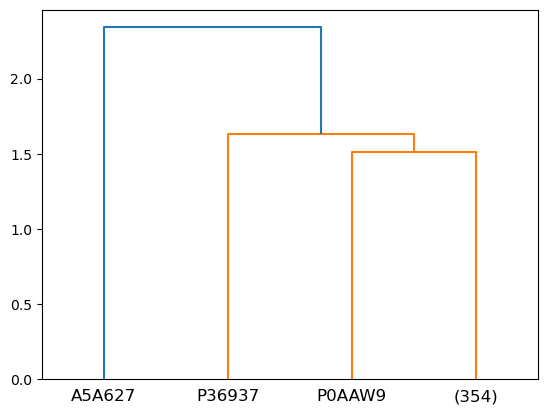

P0AEY8    1
P25527    1
P69423    1
P30130    1
P77463    1
         ..
P31553    1
P75712    1
P0AAE2    1
P31466    1
P46481    1
Length: 357, dtype: int32

A5A627    2
dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
A5A627,tisB ysdB b4618 JW3649,Small toxic protein TisB (LexA-regulated prote...,True,1,MNLVDIAILILKLIVAALQLLDAVLKYLK,83333


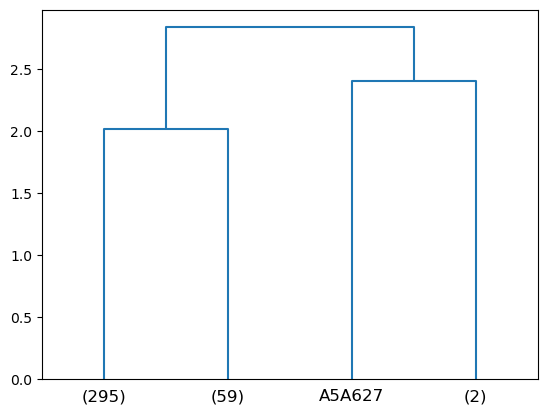

P0AEY8    1
P25527    1
P69423    1
P30130    1
P77463    1
         ..
P31553    1
P75712    1
P0AAE2    1
P31466    1
P46481    1
Length: 357, dtype: int32

P36937    2
P0AAW9    2
A5A627    2
dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
P36937,kdpF b4513 JW0687,Potassium-transporting ATPase KdpF subunit (AT...,True,1,MSAGVITGVLLVFLLLGYLVYALINAEAF,83333
P0AAW9,acrZ ybhT b0762 JW5102,Multidrug efflux pump accessory protein AcrZ (...,True,1,MLELLKSLVFAVIMVPVVMAIILGLIYGLGEVFNIFSGVGKKDQPGQNH,83333
A5A627,tisB ysdB b4618 JW3649,Small toxic protein TisB (LexA-regulated prote...,True,1,MNLVDIAILILKLIVAALQLLDAVLKYLK,83333


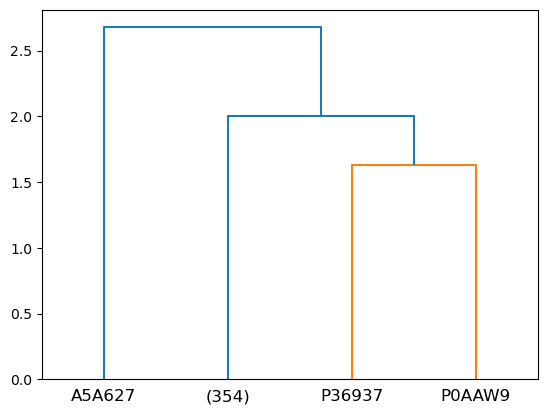

P0AEY8    1
P25527    1
P69423    1
P30130    1
P77463    1
         ..
P31553    1
P75712    1
P0AAE2    1
P31466    1
P46481    1
Length: 357, dtype: int32

A5A627    2
dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
A5A627,tisB ysdB b4618 JW3649,Small toxic protein TisB (LexA-regulated prote...,True,1,MNLVDIAILILKLIVAALQLLDAVLKYLK,83333


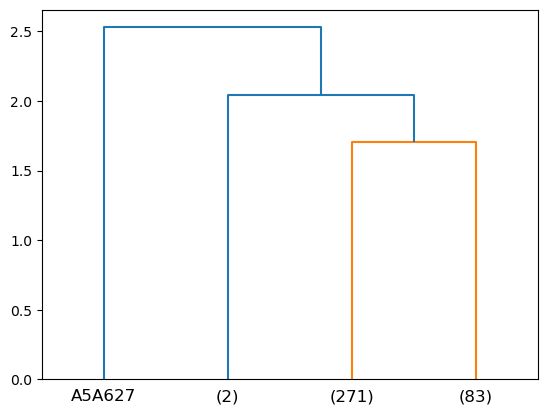

P0AEY8    1
P25527    1
P69423    1
P30130    1
P77463    1
         ..
P31553    1
P75712    1
P0AAE2    1
P31466    1
P46481    1
Length: 357, dtype: int32

A5A627    2
dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
A5A627,tisB ysdB b4618 JW3649,Small toxic protein TisB (LexA-regulated prote...,True,1,MNLVDIAILILKLIVAALQLLDAVLKYLK,83333


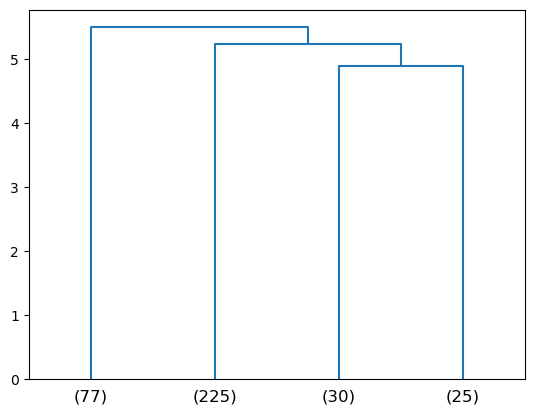

P0AEY8    2
P25527    2
P69423    2
P30130    2
P77463    2
         ..
P31553    1
P75712    2
P0AAE2    2
P31466    2
P46481    2
Length: 357, dtype: int32

P0AEY8    2
P25527    2
P69423    2
P30130    2
P77463    2
         ..
P37019    2
P75712    2
P0AAE2    2
P31466    2
P46481    2
Length: 280, dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
P0AEY8,mdfA cmlA cmr b0842 JW0826,Multidrug transporter MdfA (Chloramphenicol re...,True,1,MQNKLASGARLGRQALLFPLCLVLYEFSTYIGNDMIQPGMLAVVEQ...,83333
P25527,gabP b2663 JW2638,Gamma-aminobutyric acid permease (GABA permeas...,True,1,MGQSSQPHELGGGLKSRHVTMLSIAGVIGASLFVGSSVAIAEAGPA...,83333
P69423,tatC mttB yigU yigV b3839 JW3815,Sec-independent protein translocase protein TatC,True,1,MSVEDTQPLITHLIELRKRLLNCIIAVIVIFLCLVYFANDIYHLVS...,83333
P30130,fimD b4317 JW5780,Outer membrane usher protein FimD,True,1,MSYLNLRLYQRNTQCLHIRKHRLAGFFVRLVVACAFAAQAPLSSAD...,83333
P77463,ddpC yddQ b1485 JW1480,"Probable D,D-dipeptide transport system permea...",True,1,MMLSEETSAVRPQKQTRFNGAKLVWMLKGSPLTVTSAVIIVLMLLM...,83333
...,...,...,...,...,...,...
P37019,clcA eriC yadQ b0155 JW5012,H(+)/Cl(-) exchange transporter ClcA (ClC-ec1),True,1,MKTDTPSLETPQAARLRRRQLIRQLLERDKTPLAILFMAAVVGTLV...,83333
P75712,ybbW glxB2 b0511 JW0499,Putative allantoin permease (Allantoin transpo...,True,1,MEHQRKLFQQRGYSEDLLPKTQSQRTWKTFNYFTLWMGSVHNVPNY...,83333
P0AAE2,proY yajM b0402 JW5055,Proline-specific permease ProY,True,1,MESKNKLKRGLSTRHIRFMALGSAIGTGLFYGSADAIKMAGPSVLL...,83333
P31466,adeP purP yieG b3714 JW3692,Adenine permease AdeP,True,1,MSHQHTTQTSGQGMLERVFKLREHGTTARTEVIAGFTTFLTMVYIV...,83333


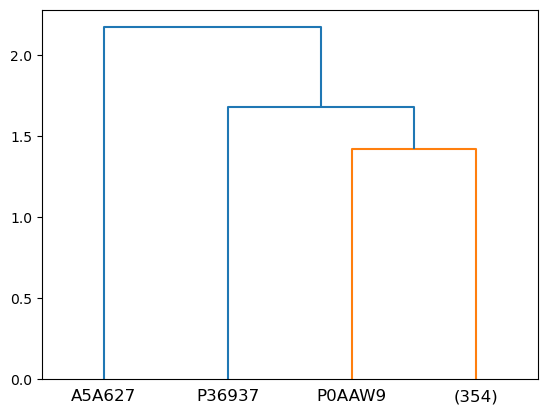

P0AEY8    1
P25527    1
P69423    1
P30130    1
P77463    1
         ..
P31553    1
P75712    1
P0AAE2    1
P31466    1
P46481    1
Length: 357, dtype: int32

A5A627    2
dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
A5A627,tisB ysdB b4618 JW3649,Small toxic protein TisB (LexA-regulated prote...,True,1,MNLVDIAILILKLIVAALQLLDAVLKYLK,83333


In [48]:
import matplotlib.pyplot as plt


#TODO refactor
for method in ["single","complete","average","weighted","ward","median"]:
    linkage = hierarchy.linkage(feature_protnlm, method=method, metric="euclidean")
    dendrogram = hierarchy.dendrogram(linkage, truncate_mode="lastp", p=4, labels=feature_protnlm.index)
    plt.show()
    labels = hierarchy.fcluster(linkage, criterion="maxclust", t=2)
    # labels = hierarchy.fcluster(linkage)
    labels = pd.Series(data=labels, index=feature_protnlm.index)
    labels.value_counts()
    display(labels)
    display(labels[labels==2])
    display(sequences.loc[labels[labels==2].index])

In [49]:
# TODO write analysis about the two clusters, and the multiple clusters
# TODO different reference sets for each cluster?
# TODO try specialized R packages for GO enrichment and compare
# TODO add percentage of terms contained
# TODO compare features: different PSSMs, combined pssms, embeddings
# TODO turn code into py file!
    # Create dendrogram from feature df; and plot it (dataframe, )
    # Get the proteins in the clusters
    # Get enrichment for each cluster and each annotation dataset.
# TODO tcdb bar plot for each subcluster: what is the distribution?
# TODO rand metric?